# About Dataset

https://www.kaggle.com/datasets/vuppalaadithyasairam/kidney-stone-prediction-based-on-urine-analysis/data

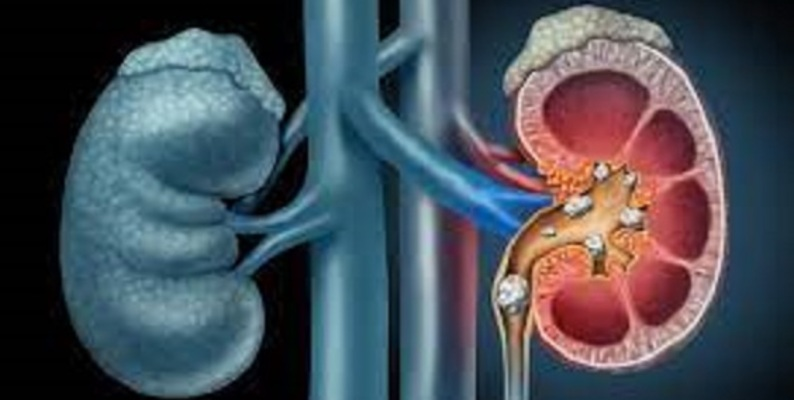

This dataset can be used to predict the presence of kidney stones based on urine analysis.

The 79 urine specimens, were analyzed in an effort to
determine if certain physical characteristics of the urine might be related to the
formation of calcium oxalate crystals.
The six physical characteristics of the urine are: 

(1) specific gravity, the density of the urine relative to water; 

(2) pH, the negative logarithm of the hydrogen ion; 

(3) osmolarity (mOsm), a unit used in biology and medicine but not in

physical chemistry. Osmolarity is proportional to the concentration of
molecules in solution; 

(4) conductivity (mMho milliMho). One Mho is one
reciprocal Ohm. Conductivity is proportional to the concentration of charged
ions in solution; 

(5) urea concentration in millimoles per litre; and 

(6) calcium concentration (CALC) in millimolesllitre.

The data is obtained from 'Physical Characteristics of Urines With and Without Crystals',a chapter from Springer Series in Statistics.

# Libraries Import

In [718]:
import math
import re
import os

In [719]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [720]:
from sklearn.preprocessing import MinMaxScaler

In [721]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import f_classif

In [813]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

In [723]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, roc_curve, roc_auc_score

In [724]:
import pickle

# Dataset Import

In [725]:
df = pd.read_csv(r"kindey stone urine analysis.csv")

# Dataset Exploration

In [726]:
df.columns

Index(['gravity', 'ph', 'osmo', 'cond', 'urea', 'calc', 'target'], dtype='object')

In [727]:
pd.concat([df.head(5), df.tail(5)])

gravity    ph  osmo  cond  urea   calc  target
0     1.021  4.91   725  14.0   443   2.45       0
1     1.017  5.74   577  20.0   296   4.49       0
2     1.008  7.20   321  14.9   101   2.36       0
3     1.011  5.51   408  12.6   224   2.15       0
4     1.005  6.52   187   7.5    91   1.16       0
74    1.025  7.90   721  23.6   301   9.04       1
75    1.017  4.81   410  13.3   195   0.58       1
76    1.024  5.40   803  21.8   394   7.82       1
77    1.016  6.81   594  21.4   255  12.20       1
78    1.015  6.03   416  12.8   178   9.39       1

In [728]:
df.describe(include='all')

gravity         ph         osmo       cond        urea       calc  \
count  79.000000  79.000000    79.000000  79.000000   79.000000  79.000000   
mean    1.018114   6.028481   612.848101  20.813924  266.405063   4.138987   
std     0.007239   0.724307   237.514755   7.938994  131.254550   3.260051   
min     1.005000   4.760000   187.000000   5.100000   10.000000   0.170000   
25%     1.012000   5.530000   413.000000  14.150000  160.000000   1.460000   
50%     1.018000   5.940000   594.000000  21.400000  260.000000   3.160000   
75%     1.023500   6.385000   792.000000  26.550000  372.000000   5.930000   
max     1.040000   7.940000  1236.000000  38.000000  620.000000  14.340000   

          target  
count  79.000000  
mean    0.430380  
std     0.498293  
min     0.000000  
25%     0.000000  
50%     0.000000  
75%     1.000000  
max     1.000000

In [729]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   gravity  79 non-null     float64
 1   ph       79 non-null     float64
 2   osmo     79 non-null     int64  
 3   cond     79 non-null     float64
 4   urea     79 non-null     int64  
 5   calc     79 non-null     float64
 6   target   79 non-null     int64  
dtypes: float64(4), int64(3)
memory usage: 4.4 KB


# Dataset Preprocessing

unique values

In [730]:
pd.DataFrame([ df.nunique(), df.dtypes ])

gravity       ph   osmo     cond   urea     calc target
0       29       70     77       64     73       75      2
1  float64  float64  int64  float64  int64  float64  int64

features type

In [731]:
TARGET = 'target'
INPUT_FEATURES = ['gravity', 'ph', 'osmo', 'cond', 'urea', 'calc']
CATEGORICAL_FEATURES = []
NUMERICAL_FEATURES = ['gravity', 'ph', 'osmo', 'cond', 'urea', 'calc']

In [732]:
# df[CATEGORICAL_FEATURES] = df[CATEGORICAL_FEATURES].astype(str)
df[NUMERICAL_FEATURES] = df[NUMERICAL_FEATURES].astype(float)
df[TARGET] = df[TARGET].astype(int)

In [733]:
pd.DataFrame([ df.nunique(), df.dtypes ])

gravity       ph     osmo     cond     urea     calc target
0       29       70       77       64       73       75      2
1  float64  float64  float64  float64  float64  float64  int64

null values

In [734]:
100.0 * df.isna().sum() / len(df)

gravity    0.0
ph         0.0
osmo       0.0
cond       0.0
urea       0.0
calc       0.0
target     0.0
dtype: float64

In [735]:
df.dropna(inplace=True)

duplicates

In [736]:
df.duplicated().sum()

np.int64(0)

In [737]:
df.drop_duplicates(inplace=True)

In [738]:
df.duplicated().sum()

np.int64(0)

# Dataset Visualization

In [739]:
plt.style.use(plt.style.available[12])

Distribuation

In [740]:
# for cat_feature in CATEGORICAL_FEATURES:
#     plt.figure(figsize=(3,3))
#     plt.title(f"Count plot: {cat_feature}")
#     sns.countplot(df, x=cat_feature, hue=cat_feature,legend=False)
#     plt.show()

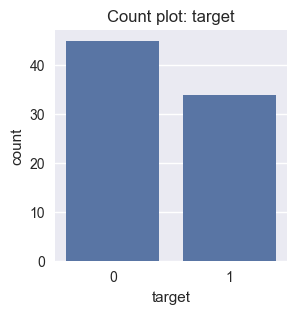

In [741]:
plt.figure(figsize=(3,3))
plt.title(f"Count plot: {TARGET}")
sns.countplot(df, x=TARGET)
plt.show()

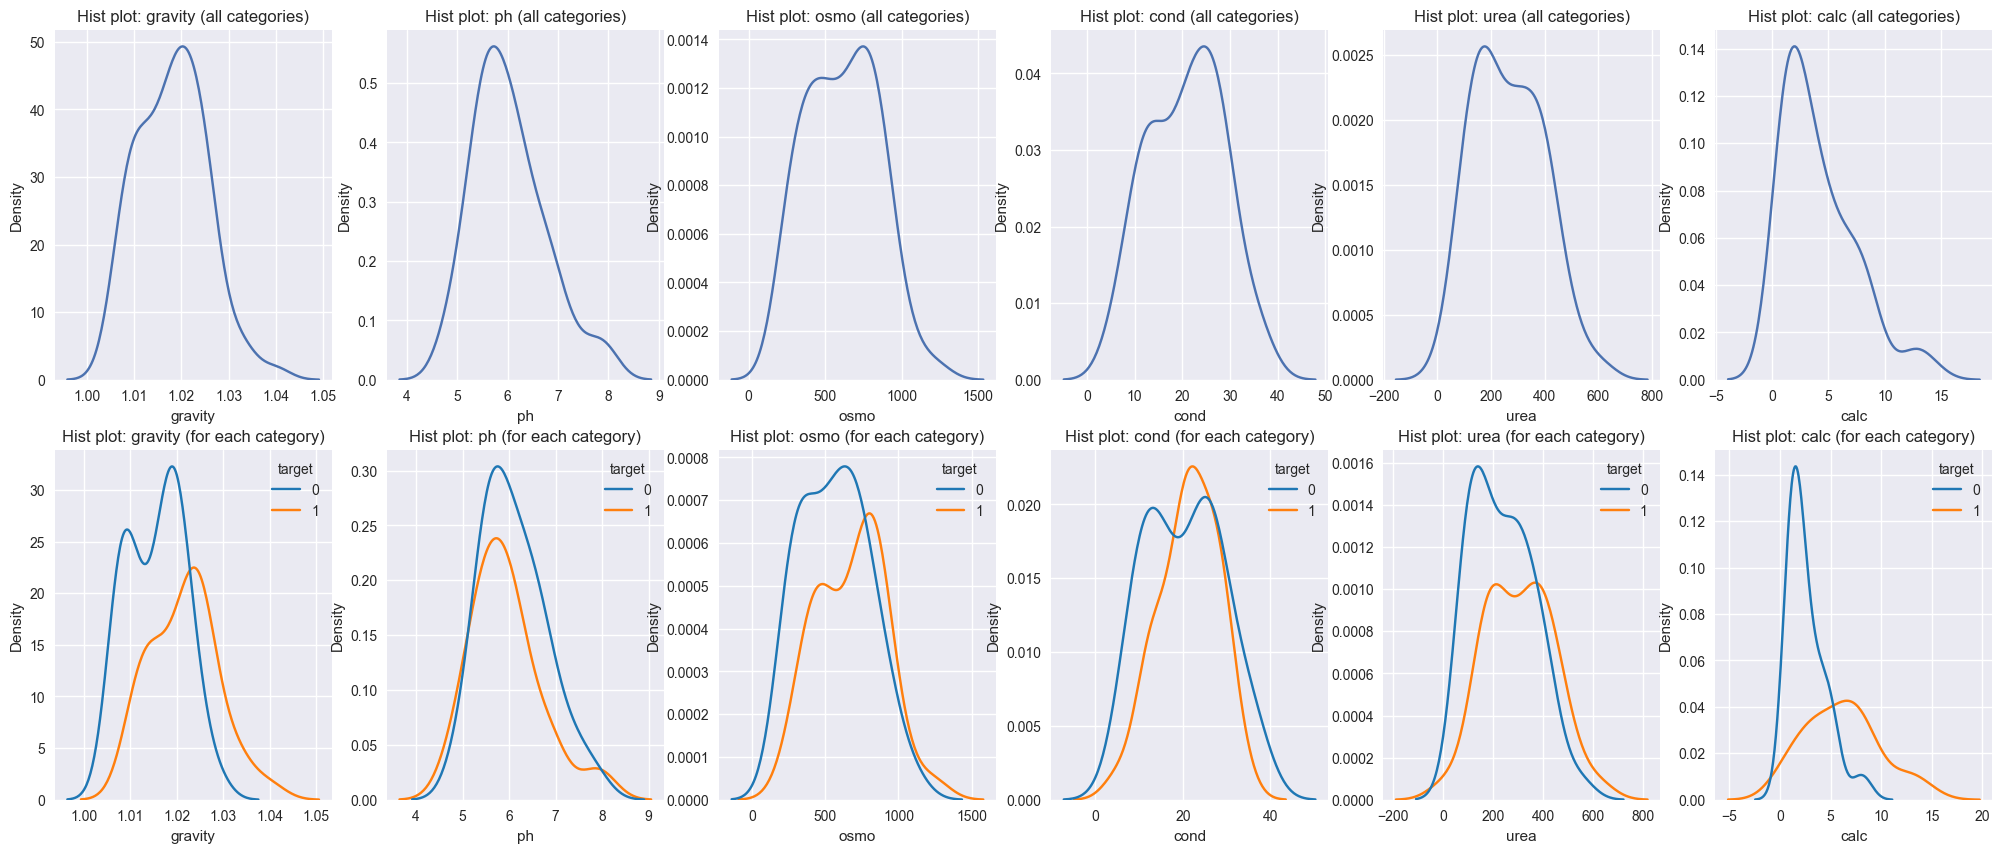

In [742]:
ROW_WIDTH = 6
temp = 0

for num_feature in NUMERICAL_FEATURES:
    if temp == 0:
        plt.figure(figsize=(25,10))

    plt.subplot(2,ROW_WIDTH, temp + 1)
    plt.title(f"Hist plot: {num_feature} (all categories)")
    sns.kdeplot(df, x=num_feature)
    

    plt.subplot(2,ROW_WIDTH, (temp + 1) + ROW_WIDTH)
    plt.title(f"Hist plot: {num_feature} (for each category)")
    sns.kdeplot(df, x=num_feature, hue=TARGET, palette='tab10')
    
    if temp == ROW_WIDTH - 1:
        plt.show()

    temp = (temp + 1) % ROW_WIDTH

if temp != ROW_WIDTH - 1:
    plt.show()

scatter with output

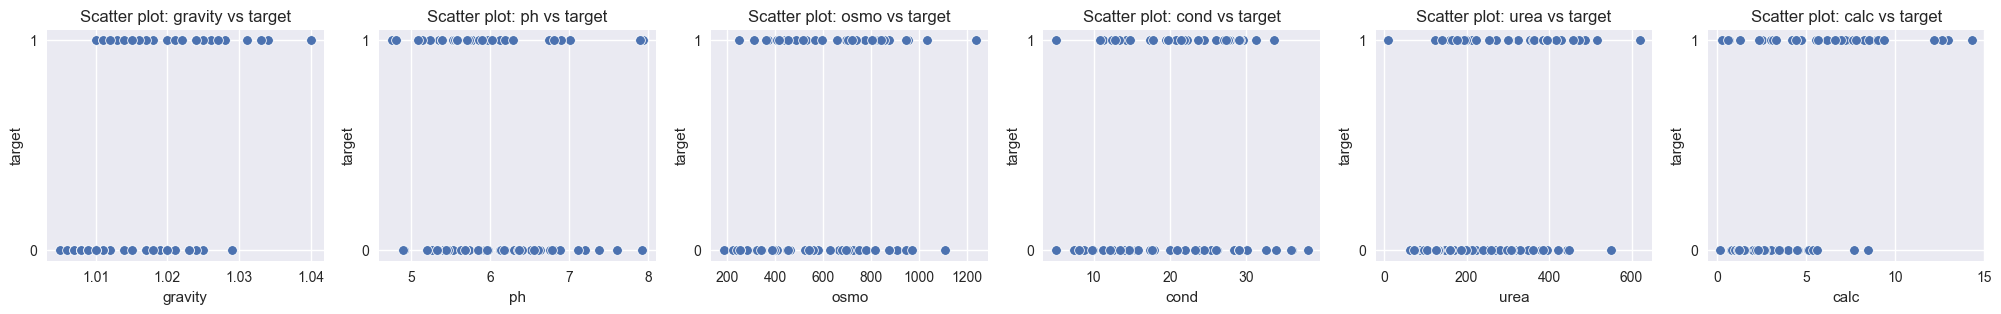

In [743]:
ROW_WIDTH = 6
temp = 0

for num_feature in NUMERICAL_FEATURES:
    if temp == 0:
        plt.figure(figsize=(25,3))

    plt.subplot(1,ROW_WIDTH, temp + 1)
    plt.title(f"Scatter plot: {num_feature} vs {TARGET}")
    sns.scatterplot(df, x=num_feature, y=TARGET)
    plt.yticks([0, 1])

    if temp == ROW_WIDTH - 1:
        plt.show()

    temp = (temp + 1) % ROW_WIDTH

if temp != ROW_WIDTH - 1:
    plt.show()    

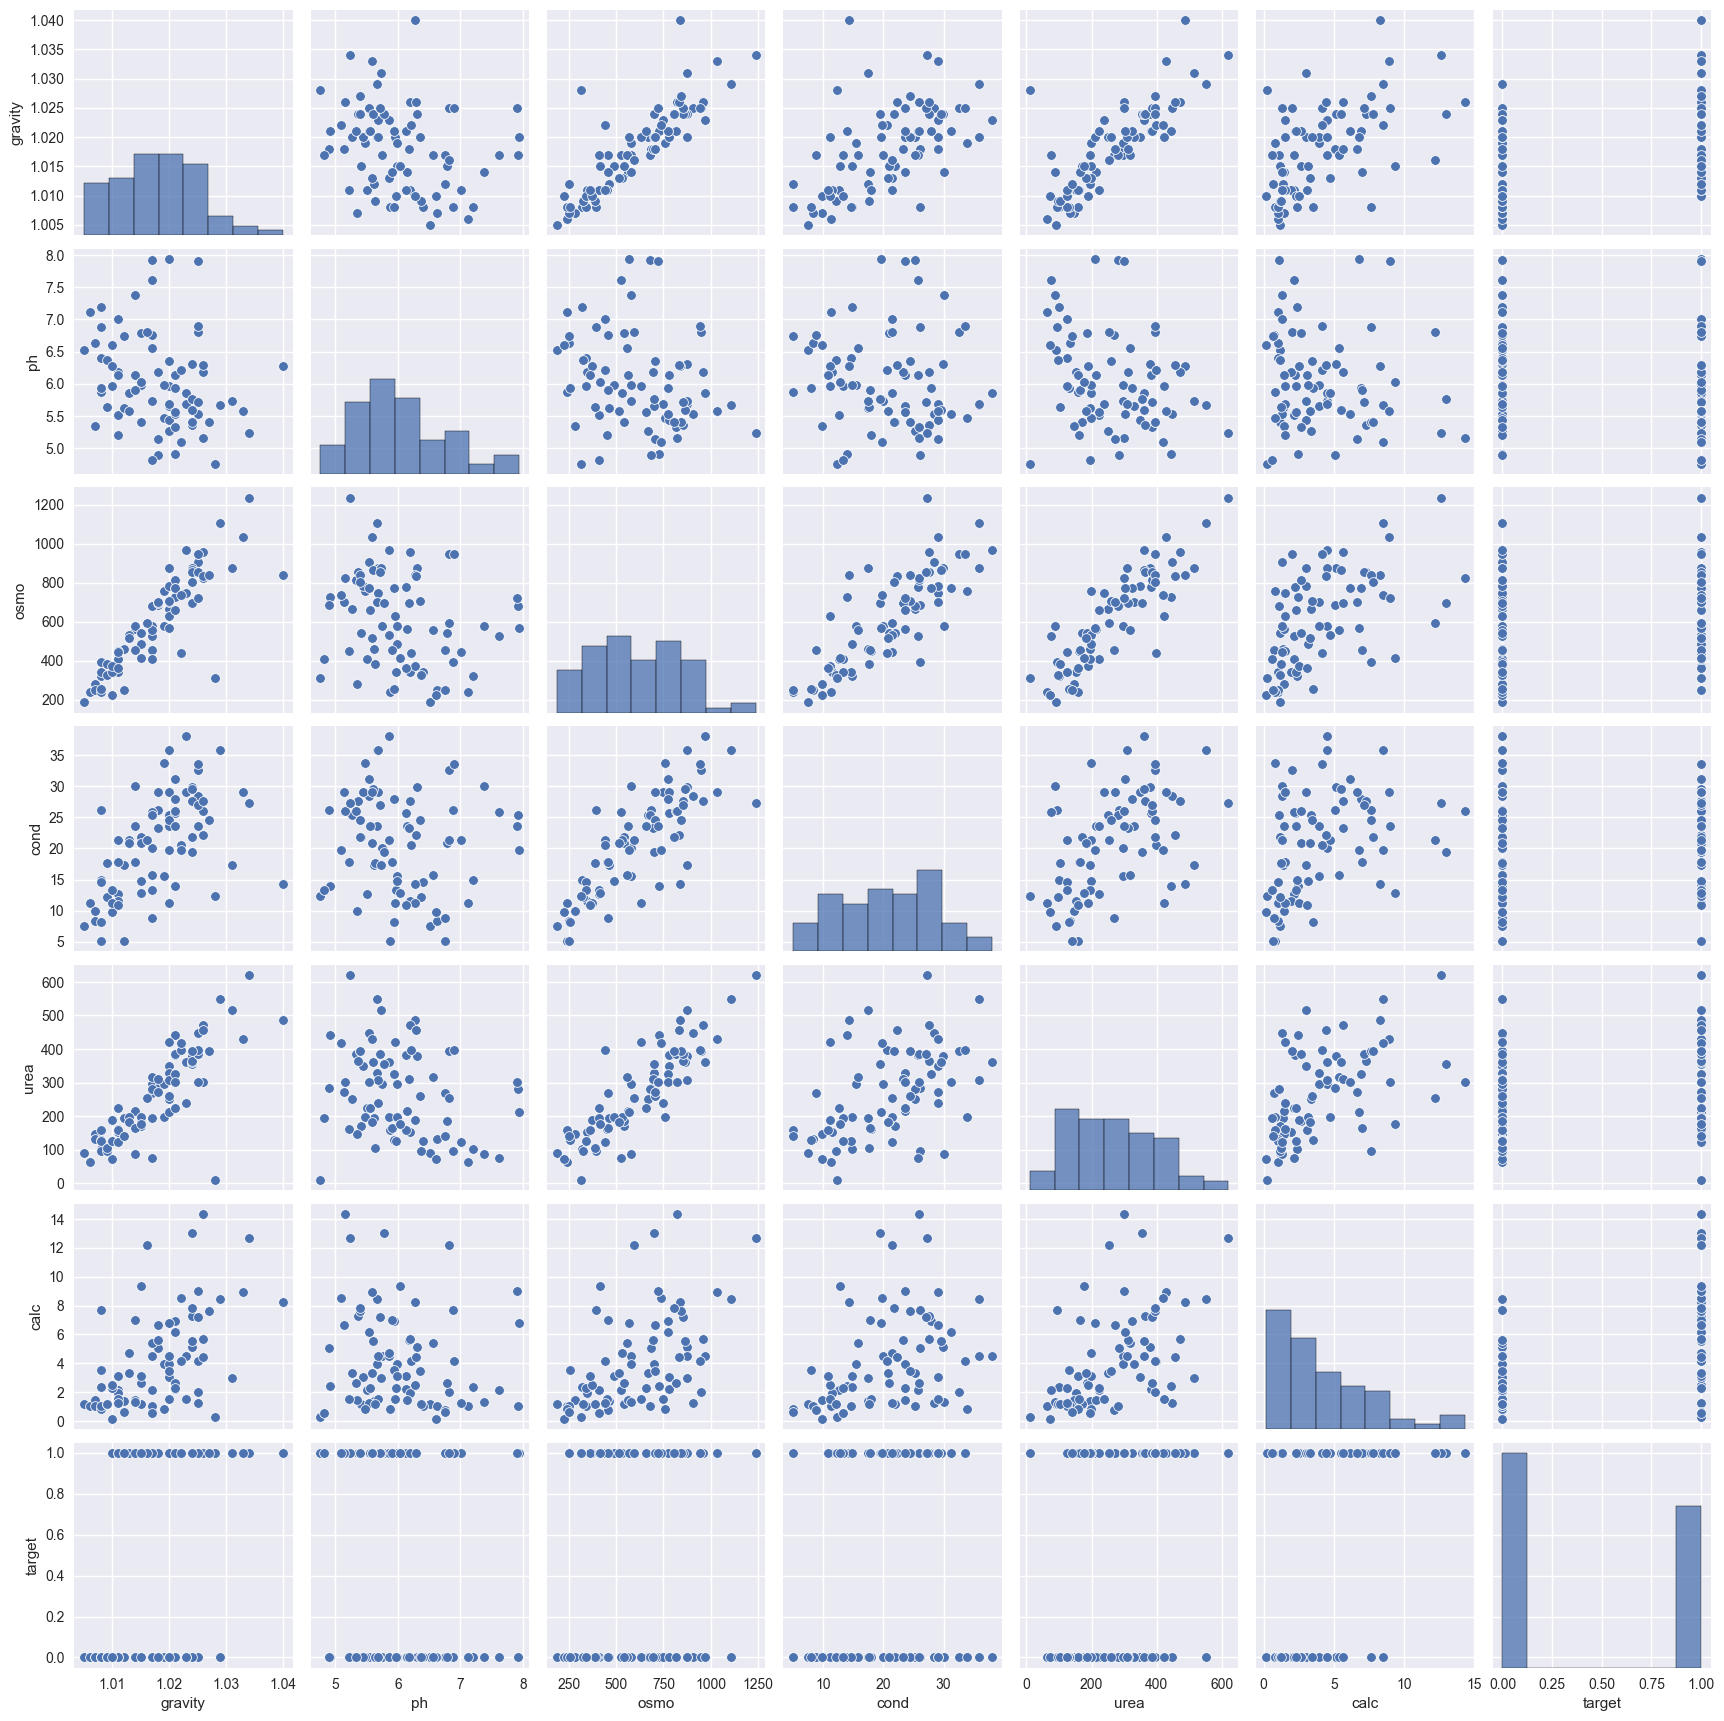

In [744]:
sns.pairplot(data=df)

bar plot

In [745]:
# ROW_WIDTH = 3 
# temp = 0

# for cat_feature in CATEGORICAL_FEATURES:
#     if temp == 0:
#         plt.figure(figsize=(10,3))

#     plt.subplot(1,ROW_WIDTH, temp + 1)
#     plt.title(f"Bar plot: {cat_feature} vs {TARGET}")
#     sns.barplot(df, x=cat_feature, y=TARGET)

#     if temp == ROW_WIDTH - 1:
#         plt.show()

#     temp = (temp + 1) % ROW_WIDTH

# if temp != ROW_WIDTH - 1:
#     plt.show()    

# Outliers

In [746]:
def plot_box(features, hue):
    ROW_WIDTH = 6
    temp = 0

    for num_feature in features:
        if temp == 0:
            plt.figure(figsize=(25,5))

        plt.subplot(1,ROW_WIDTH, temp + 1)
        plt.title(f"Box plot: {num_feature}")
        sns.boxplot(df, x=num_feature, hue=hue, palette='rocket')

        if temp == ROW_WIDTH - 1:
            plt.show()

        temp = (temp + 1) % ROW_WIDTH

    if temp != ROW_WIDTH - 1:
        plt.show()    

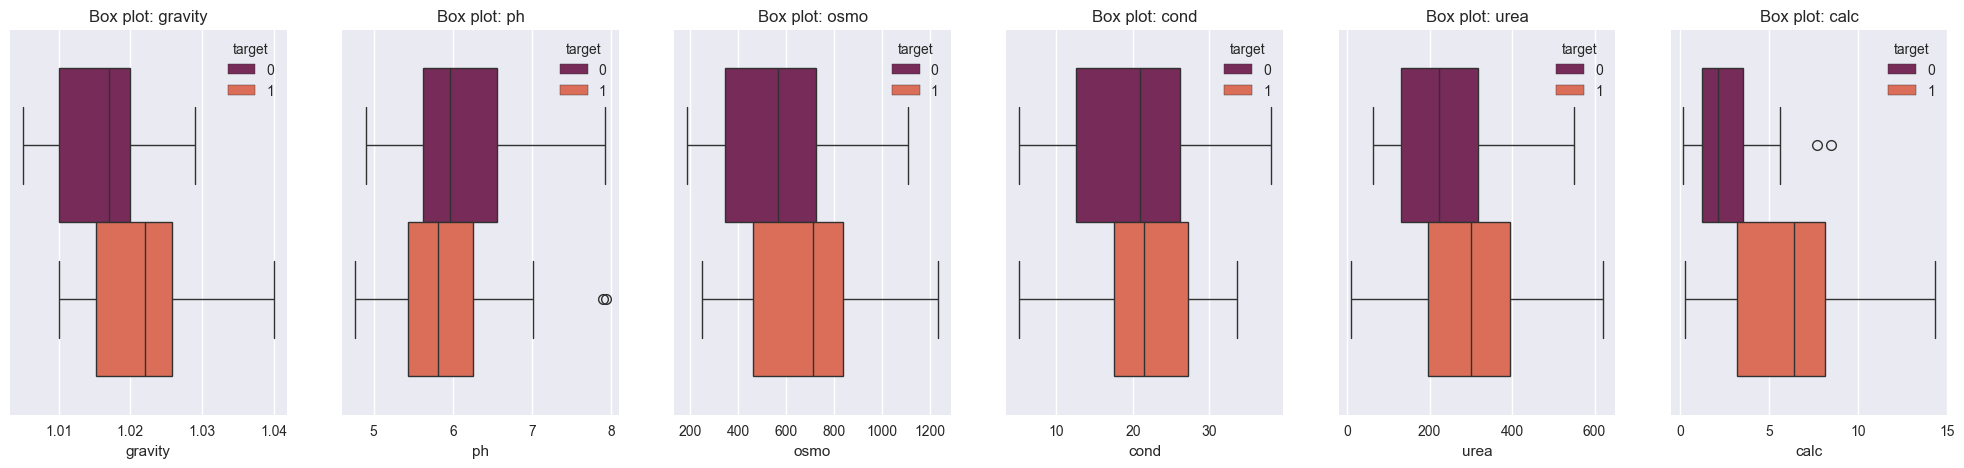

In [747]:
plot_box(NUMERICAL_FEATURES, TARGET)

In [748]:
def IQR(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    
    IQR = Q3 - Q1

    min_v = Q1 - 1.5 * IQR
    max_v = Q3 + 1.5 * IQR

    return series.clip(lower=min_v, upper=max_v)


In [749]:
for num_feature in NUMERICAL_FEATURES:
    for gender_category in set(df[TARGET].values):
        mask = df[TARGET] == gender_category
        df.loc[mask, num_feature] = IQR(df.loc[mask, num_feature])

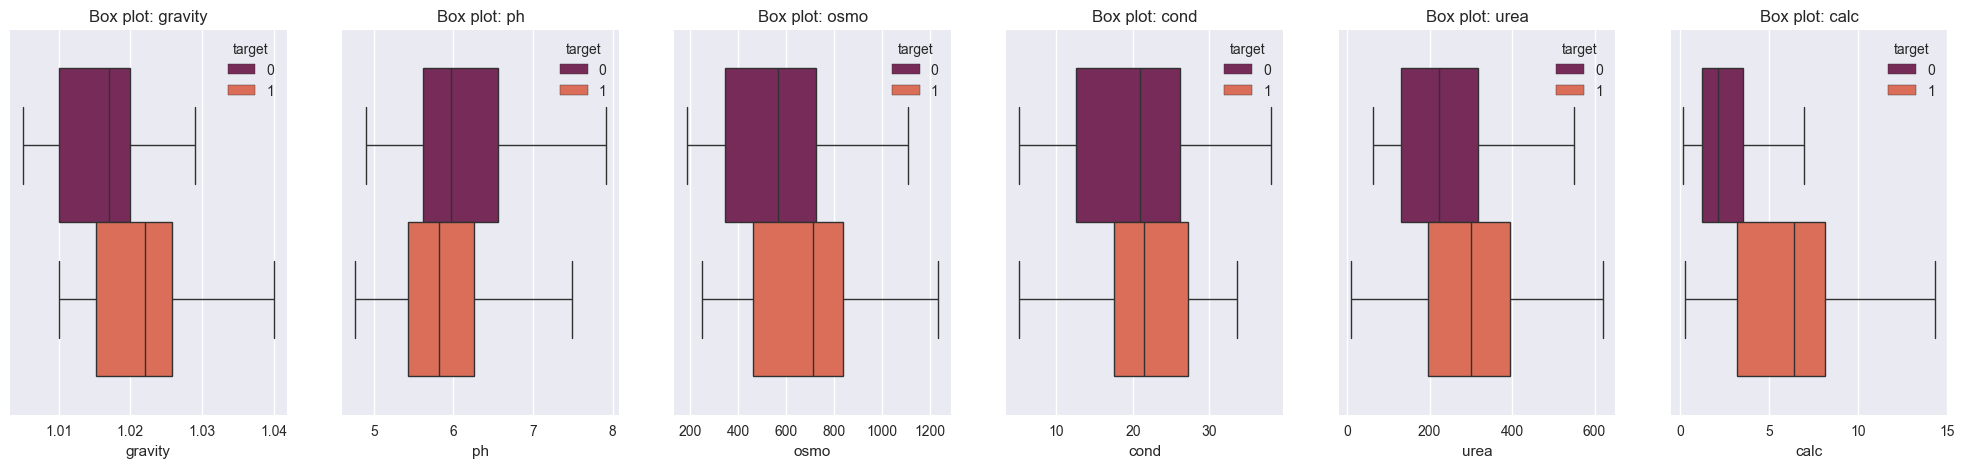

In [750]:
plot_box(NUMERICAL_FEATURES, TARGET)

In [751]:
# plot_box([TARGET],None)

# Feauter Engineering

In [752]:
INPUT_FEATURES

['gravity', 'ph', 'osmo', 'cond', 'urea', 'calc']

H+ ion

In [753]:
new_feature_name = f'H+ ion'
df[new_feature_name] = df['ph'].apply(lambda ph: 10**(-ph) )

if new_feature_name not in INPUT_FEATURES:
    NUMERICAL_FEATURES.append(new_feature_name)
    INPUT_FEATURES.append(new_feature_name)

Medium type 
(low pH = acidic, high pH = alkaline).

In [754]:
new_feature_name = f'acidic_0 / alkaline_1'
df[new_feature_name] = df['ph'].apply(lambda ph:  ph < 7.0 ).astype(int)

if new_feature_name not in INPUT_FEATURES:
    CATEGORICAL_FEATURES.append(new_feature_name)
    INPUT_FEATURES.append(new_feature_name)

calc_osmo

In [755]:
new_feature_name = f'calc_osmo'
df[new_feature_name] = df['calc'] * df['osmo']

if new_feature_name not in INPUT_FEATURES:
    NUMERICAL_FEATURES.append(new_feature_name)
    INPUT_FEATURES.append(new_feature_name)

cond_osmo_ratio

In [756]:
new_feature_name = f'cond_osmo_ratio'
df[new_feature_name] = df['cond'] / df['osmo']

if new_feature_name not in INPUT_FEATURES:
    NUMERICAL_FEATURES.append(new_feature_name)
    INPUT_FEATURES.append(new_feature_name)

urea_gravity_ratio

In [757]:
new_feature_name = f'urea_gravity_ratio'
df[new_feature_name] = df['urea'] / df['gravity']

if new_feature_name not in INPUT_FEATURES:
    NUMERICAL_FEATURES.append(new_feature_name)
    INPUT_FEATURES.append(new_feature_name)

poly 

In [758]:
# n_degrees = [0.5, 2]
# old_features = list(NUMERICAL_FEATURES)

# for n_degree in n_degrees:
#     for num_feature in old_features:
#         new_feature_name = f'{num_feature} ^ {n_degree}'
#         df[new_feature_name] = df[num_feature].apply(lambda x: x**n_degree)

#         if new_feature_name not in INPUT_FEATURES:
#             NUMERICAL_FEATURES.append(new_feature_name)
#             INPUT_FEATURES.append(new_feature_name)

In [759]:
INPUT_FEATURES

['gravity',
 'ph',
 'osmo',
 'cond',
 'urea',
 'calc',
 'H+ ion',
 'acidic_0 / alkaline_1',
 'calc_osmo',
 'cond_osmo_ratio',
 'urea_gravity_ratio']

# Correlation Matrix

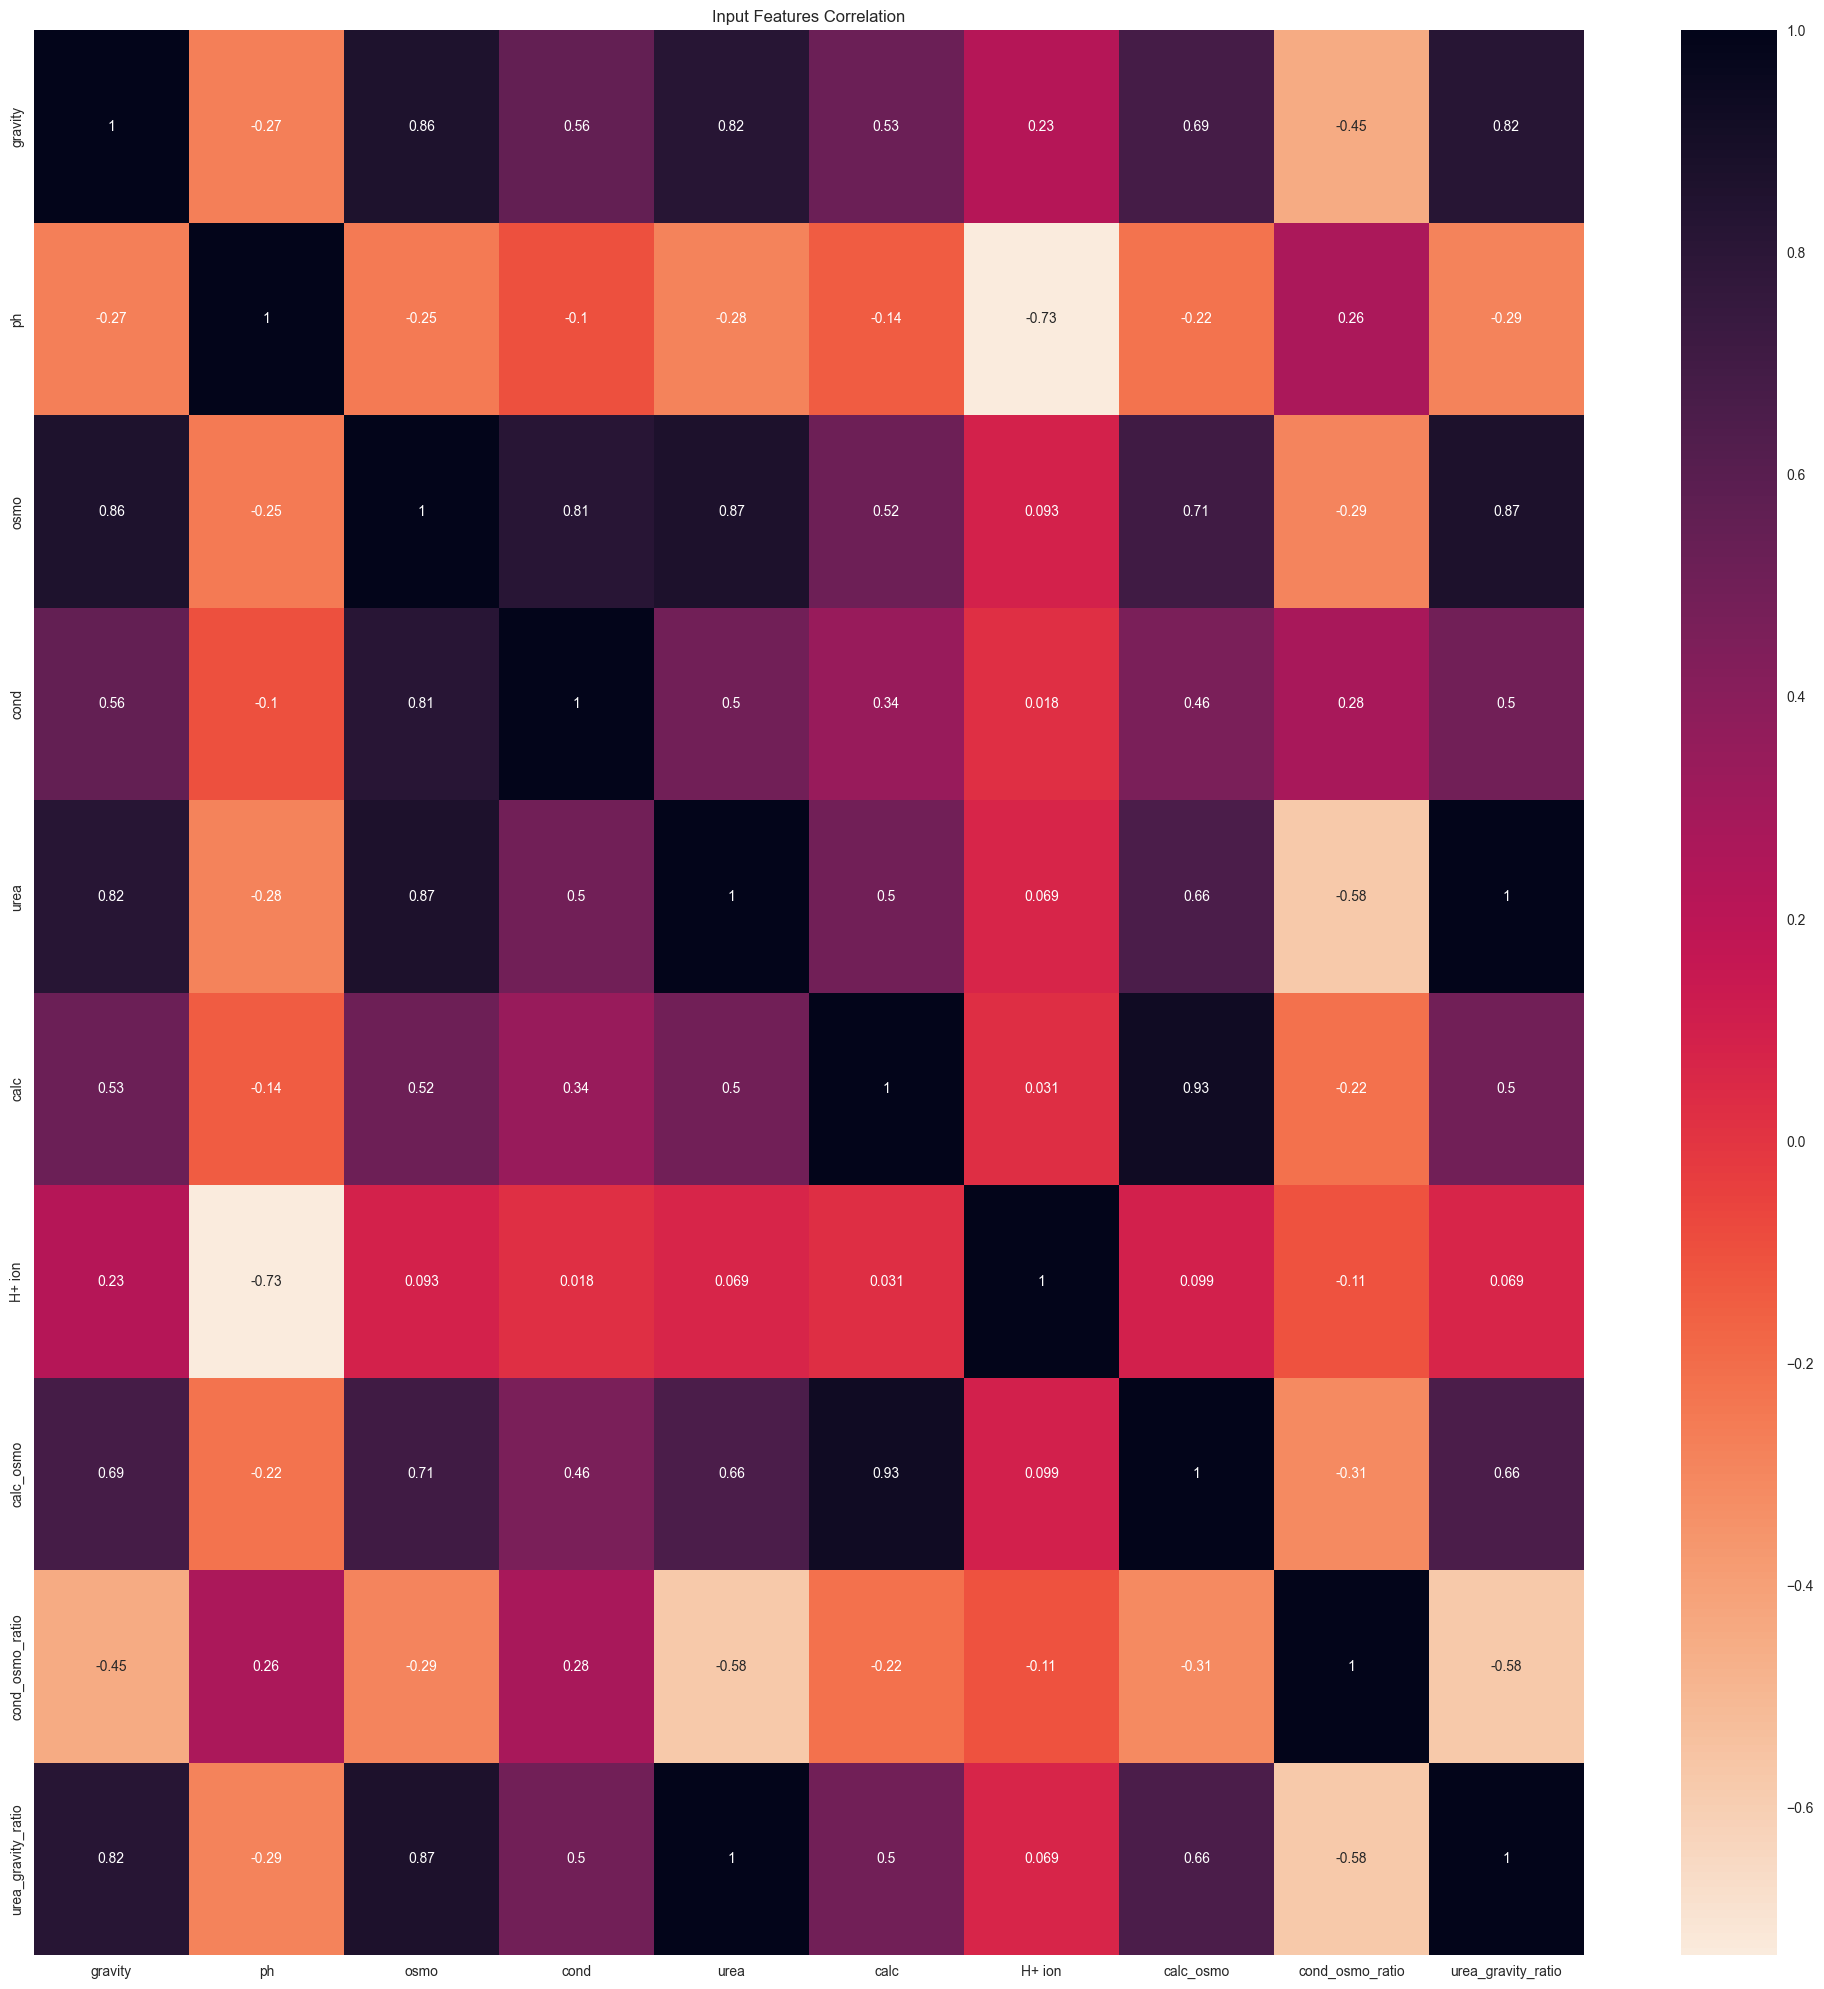

In [760]:
plt.figure(figsize=(25, 25)) 

plt.title("Input Features Correlation")

sns.heatmap( 
    df[NUMERICAL_FEATURES].corr(),
    annot=True,
    cmap='rocket_r',
    )

plt.show()

In [761]:
def drop_feature(feature):
    global INPUT_FEATURES, NUMERICAL_FEATURES, CATEGORICAL_FEATURES

    if feature in INPUT_FEATURES:
        INPUT_FEATURES.remove(feature)

    if feature in NUMERICAL_FEATURES:
        NUMERICAL_FEATURES.remove(feature)

    if feature in CATEGORICAL_FEATURES:
        CATEGORICAL_FEATURES.remove(feature)

In [762]:
INPUT_FEATURES

['gravity',
 'ph',
 'osmo',
 'cond',
 'urea',
 'calc',
 'H+ ion',
 'acidic_0 / alkaline_1',
 'calc_osmo',
 'cond_osmo_ratio',
 'urea_gravity_ratio']

In [763]:
drop_feature('urea_gravity_ratio') # keep urea only

In [764]:
INPUT_FEATURES

['gravity',
 'ph',
 'osmo',
 'cond',
 'urea',
 'calc',
 'H+ ion',
 'acidic_0 / alkaline_1',
 'calc_osmo',
 'cond_osmo_ratio']

F-value: Measures how much the means between groups differ relative to the variance within the groups. Higher = more likely the feature is important.

p-value: Probability that the observed difference is due to chance.

p < 0.05 → Statistically significant

p ≥ 0.05 → Not significant

In [765]:
f_values, p_values = f_classif(df[NUMERICAL_FEATURES], df[TARGET])

for i in range(len(NUMERICAL_FEATURES)):
    print(f"{NUMERICAL_FEATURES[i]:15s}: F-value = {f_values[i]:6.3f}, p-value = {p_values[i]:3.3f}")

gravity        : F-value = 16.475, p-value = 0.000
ph             : F-value =  1.419, p-value = 0.237
osmo           : F-value =  4.374, p-value = 0.040
cond           : F-value =  0.276, p-value = 0.601
urea           : F-value =  5.509, p-value = 0.021
calc           : F-value = 33.419, p-value = 0.000
H+ ion         : F-value =  1.637, p-value = 0.205
calc_osmo      : F-value = 26.185, p-value = 0.000
cond_osmo_ratio: F-value =  5.261, p-value = 0.025


In [766]:
drop_feature('cond') # p value = 0.601 very high

In [767]:
INPUT_FEATURES

['gravity',
 'ph',
 'osmo',
 'urea',
 'calc',
 'H+ ion',
 'acidic_0 / alkaline_1',
 'calc_osmo',
 'cond_osmo_ratio']

# Encoding & Scaling

In [768]:
trainable_df = df.copy()

In [769]:
# trainable_df = pd.get_dummies(trainable_df, columns=CATEGORICAL_FEATURES, drop_first=False, dtype=int)

In [770]:
min_max_scaller = MinMaxScaler()

min_max_scaller.fit(trainable_df[NUMERICAL_FEATURES])

MinMaxScaler()

In [771]:
trainable_df.loc[:,NUMERICAL_FEATURES] = min_max_scaller.transform(trainable_df[NUMERICAL_FEATURES])

In [772]:
df.head()

gravity    ph   osmo  cond   urea  calc  target        H+ ion  \
0    1.021  4.91  725.0  14.0  443.0  2.45       0  1.230269e-05   
1    1.017  5.74  577.0  20.0  296.0  4.49       0  1.819701e-06   
2    1.008  7.20  321.0  14.9  101.0  2.36       0  6.309573e-08   
3    1.011  5.51  408.0  12.6  224.0  2.15       0  3.090295e-06   
4    1.005  6.52  187.0   7.5   91.0  1.16       0  3.019952e-07   

   acidic_0 / alkaline_1  calc_osmo  cond_osmo_ratio  urea_gravity_ratio  
0                      1    1776.25         0.019310          433.888345  
1                      1    2590.73         0.034662          291.052114  
2                      0     757.56         0.046417          100.198413  
3                      1     877.20         0.030882          221.562809  
4                      1     216.92         0.040107           90.547264

In [773]:
trainable_df.head()

gravity        ph      osmo  cond      urea      calc  target    H+ ion  \
0  0.457143  0.047468  0.512869  14.0  0.709836  0.160903       0  0.707744   
1  0.342857  0.310127  0.371783  20.0  0.468852  0.304869       0  0.104093   
2  0.085714  0.772152  0.127741  14.9  0.149180  0.154552       0  0.002941   
3  0.171429  0.237342  0.210677  12.6  0.350820  0.139732       0  0.177259   
4  0.000000  0.556962  0.000000   7.5  0.132787  0.069866       0  0.016698   

   acidic_0 / alkaline_1  calc_osmo  cond_osmo_ratio  urea_gravity_ratio  
0                      1   0.111166         0.045824          433.888345  
1                      1   0.163262         0.359050          291.052114  
2                      0   0.046009         0.598900          100.198413  
3                      1   0.053661         0.281932          221.562809  
4                      1   0.011428         0.470145           90.547264

# Dataset Splitting

In [774]:
X_train,X_test, y_train, y_test = train_test_split( 
    trainable_df.drop(TARGET, axis=1), 
    trainable_df.loc[:, TARGET],
    test_size=0.25,
    random_state=41,
    stratify=trainable_df.loc[:, TARGET],
  )

In [775]:
print(f"{X_train.shape= }")
print(f"{y_train.shape= }")
print(f"{X_test.shape= }")
print(f"{y_test.shape= }")

X_train.shape= (59, 11)
y_train.shape= (59,)
X_test.shape= (20, 11)
y_test.shape= (20,)


In [776]:
y_train.value_counts()

target
0    34
1    25
Name: count, dtype: int64

In [777]:
y_test.value_counts()

target
0    11
1     9
Name: count, dtype: int64

# Model Definition & Training

In [815]:
CACHE_MODELS_DIR_NAME = 'models_cache' 
os.makedirs(CACHE_MODELS_DIR_NAME, exist_ok=True)

In [816]:
class CustomModel:
    def __init__(self, name, model, extra_train_param = None ):

        self.name = str(name)
        self.model = model
        self.extra_train_param = extra_train_param

        self.y_train_hat = None
        self.y_test_hat = None
        
        self.load()


    def fit(self, x_train, y_train):
        if self.trained == False:
            
            if self.extra_train_param is None:
                self.model.fit(x_train, y_train)
            else:
                self.model.fit(x_train, y_train, **self.extra_train_param)

            self.trained = True
            self.save()
    
    def prdict_on_train(self, x_train):
        if self.y_train_hat is None:
            self.y_train_hat = self.model.predict(x_train)
    
    def prdict_on_test(self, x_test):
        if self.y_test_hat is None:
            self.y_test_hat = self.model.predict(x_test)
    
    def save(self):
        file_name = re.sub('', '', str(self.name).lower())
        file_path = CACHE_MODELS_DIR_NAME + '/' + file_name + '.pickle'
        with open(file_path, 'wb') as f:
           pickle.dump(self.model, f)        

    def load(self):
        file_name = re.sub('', '', str(self.name).lower())
        file_path = CACHE_MODELS_DIR_NAME + '/' + file_name + '.pickle'

        if os.path.exists(file_path):
            with open(file_path, 'rb') as f:
                self.model = pickle.load(f)
            self.trained = True
        else:
            self.trained = False

In [817]:
models_list = []

models_list.append(CustomModel("Logistic Regression", LogisticRegression()))

models_list.append(CustomModel("SVC linear kernel", SVC(kernel='linear')))
models_list.append(CustomModel("SVC poly kernel", SVC(kernel='poly')))
models_list.append(CustomModel("SVC rbf kernel", SVC(kernel='rbf')))
models_list.append(CustomModel("SVC rbf sigmoid", SVC(kernel='sigmoid')))

models_list.append(CustomModel("KNN k=3", KNeighborsClassifier(n_neighbors=3)))
models_list.append(CustomModel("KNN k=5", KNeighborsClassifier(n_neighbors=5)))
models_list.append(CustomModel("KNN k=7", KNeighborsClassifier(n_neighbors=7)))

models_list.append(CustomModel("Gaussian NB", GaussianNB()))

models_list.append(CustomModel("Decision Tree max-depth=3", DecisionTreeClassifier(max_depth=3)))
models_list.append(CustomModel("Decision Tree max-depth=4", DecisionTreeClassifier(max_depth=4)))
models_list.append(CustomModel("Decision Tree max-depth=5", DecisionTreeClassifier(max_depth=5)))
# models_list.append(CustomModel("Decision Tree max-depth=7", DecisionTreeClassifier(max_depth=7)))

models_list.append(CustomModel("Random Forest, trees=3", RandomForestClassifier(n_estimators=3)))
models_list.append(CustomModel("Random Forest, trees=5", RandomForestClassifier(n_estimators=5)))
models_list.append(CustomModel("Random Forest, trees=7", RandomForestClassifier(n_estimators=7)))


models_list.append(CustomModel("Ada Boost estimator=3 max_depth=2", AdaBoostClassifier(n_estimators=3, estimator=RandomForestClassifier(max_depth=1))))
models_list.append(CustomModel("Ada Boost estimator=5 max_depth=2", AdaBoostClassifier(n_estimators=5, estimator=RandomForestClassifier(max_depth=1))))
models_list.append(CustomModel("Ada Boost estimator=7 max_depth=2", AdaBoostClassifier(n_estimators=7, estimator=RandomForestClassifier(max_depth=1))))

models_list.append(CustomModel("Gradient Boosting estimator=2", GradientBoostingClassifier(n_estimators=2)))
models_list.append(CustomModel("Gradient Boosting estimator=3", GradientBoostingClassifier(n_estimators=3)))
models_list.append(CustomModel("Gradient Boosting estimator=5", GradientBoostingClassifier(n_estimators=5)))


In [818]:
for i, model in enumerate(models_list):
    print(f'{i+1:3d}/{len(models_list)}. Train {model.name}')
    model.fit(X_train,y_train)

  1/21. Train Logistic Regression
  2/21. Train SVC linear kernel
  3/21. Train SVC poly kernel
  4/21. Train SVC rbf kernel
  5/21. Train SVC rbf sigmoid
  6/21. Train KNN k=3
  7/21. Train KNN k=5
  8/21. Train KNN k=7
  9/21. Train Gaussian NB
 10/21. Train Decision Tree max-depth=3
 11/21. Train Decision Tree max-depth=4
 12/21. Train Decision Tree max-depth=5
 13/21. Train Random Forest, trees=3
 14/21. Train Random Forest, trees=5
 15/21. Train Random Forest, trees=7
 16/21. Train Ada Boost estimator=3 max_depth=2
 17/21. Train Ada Boost estimator=5 max_depth=2
 18/21. Train Ada Boost estimator=7 max_depth=2
 19/21. Train Gradient Boosting estimator=2
 20/21. Train Gradient Boosting estimator=3
 21/21. Train Gradient Boosting estimator=5


# Model Prediction & Evaluation

Prediction

In [819]:
for i, model in enumerate(models_list):
    print(f'{i+1:3d}/{len(models_list)}. Predict {model.name} on train data')
    model.prdict_on_train(X_train)

  1/21. Predict Logistic Regression on train data
  2/21. Predict SVC linear kernel on train data
  3/21. Predict SVC poly kernel on train data
  4/21. Predict SVC rbf kernel on train data
  5/21. Predict SVC rbf sigmoid on train data
  6/21. Predict KNN k=3 on train data
  7/21. Predict KNN k=5 on train data
  8/21. Predict KNN k=7 on train data
  9/21. Predict Gaussian NB on train data
 10/21. Predict Decision Tree max-depth=3 on train data
 11/21. Predict Decision Tree max-depth=4 on train data
 12/21. Predict Decision Tree max-depth=5 on train data
 13/21. Predict Random Forest, trees=3 on train data
 14/21. Predict Random Forest, trees=5 on train data
 15/21. Predict Random Forest, trees=7 on train data
 16/21. Predict Ada Boost estimator=3 max_depth=2 on train data
 17/21. Predict Ada Boost estimator=5 max_depth=2 on train data
 18/21. Predict Ada Boost estimator=7 max_depth=2 on train data
 19/21. Predict Gradient Boosting estimator=2 on train data
 20/21. Predict Gradient Boost

In [820]:
for i, model in enumerate(models_list):
    print(f'{i+1:3d}/{len(models_list)}. Predict {model.name} on test data')
    model.prdict_on_test(X_test)

  1/21. Predict Logistic Regression on test data
  2/21. Predict SVC linear kernel on test data
  3/21. Predict SVC poly kernel on test data
  4/21. Predict SVC rbf kernel on test data
  5/21. Predict SVC rbf sigmoid on test data
  6/21. Predict KNN k=3 on test data
  7/21. Predict KNN k=5 on test data
  8/21. Predict KNN k=7 on test data
  9/21. Predict Gaussian NB on test data
 10/21. Predict Decision Tree max-depth=3 on test data
 11/21. Predict Decision Tree max-depth=4 on test data
 12/21. Predict Decision Tree max-depth=5 on test data
 13/21. Predict Random Forest, trees=3 on test data
 14/21. Predict Random Forest, trees=5 on test data
 15/21. Predict Random Forest, trees=7 on test data
 16/21. Predict Ada Boost estimator=3 max_depth=2 on test data
 17/21. Predict Ada Boost estimator=5 max_depth=2 on test data
 18/21. Predict Ada Boost estimator=7 max_depth=2 on test data
 19/21. Predict Gradient Boosting estimator=2 on test data
 20/21. Predict Gradient Boosting estimator=3 on 

Evaluation

In [821]:
evaluation_dataset = []

for i, model in enumerate(models_list):
    print(f'{i+1:02d}/{len(models_list)}. Evaluate {model.name}')

    accuracy_score_train = accuracy_score( y_train, model.y_train_hat )
    accuracy_score_test = accuracy_score( y_test, model.y_test_hat )

    recall_score_train = recall_score( y_train, model.y_train_hat )
    recall_score_test = recall_score( y_test, model.y_test_hat )

    precision_score_train = precision_score( y_train, model.y_train_hat )
    precision_score_test = precision_score( y_test, model.y_test_hat )

    f1_score_train = f1_score( y_train, model.y_train_hat )
    f1_score_test = f1_score( y_test, model.y_test_hat)

    roc_auc_score_train = roc_auc_score( y_train, model.y_train_hat )
    roc_auc_score_test = roc_auc_score( y_test, model.y_test_hat)


    evaluation_dataset.append({
        "model": model.name, 'accuracy_score': accuracy_score_train, 
        'recall_score': recall_score_train, 'f1_score':f1_score_train, 
        'roc_auc_score':roc_auc_score_train, 'precision_score':precision_score_train,
        'data':'train'}
    )

    evaluation_dataset.append({
        "model": model.name, 'accuracy_score': accuracy_score_test, 
        'recall_score': recall_score_test, 'f1_score':f1_score_test, 
        'roc_auc_score':roc_auc_score_test, 'precision_score':precision_score_test,
        'data':'test'}
    )


    print(evaluation_dataset[-2])
    print(evaluation_dataset[-1])
    print('\n')


evaluation_dataset = pd.DataFrame(evaluation_dataset)

01/21. Evaluate Logistic Regression
{'model': 'Logistic Regression', 'accuracy_score': 0.7627118644067796, 'recall_score': 0.56, 'f1_score': 0.6666666666666666, 'roc_auc_score': np.float64(0.7358823529411764), 'precision_score': 0.8235294117647058, 'data': 'train'}
{'model': 'Logistic Regression', 'accuracy_score': 0.55, 'recall_score': 0.3333333333333333, 'f1_score': 0.4, 'roc_auc_score': np.float64(0.5303030303030303), 'precision_score': 0.5, 'data': 'test'}


02/21. Evaluate SVC linear kernel
{'model': 'SVC linear kernel', 'accuracy_score': 0.7966101694915254, 'recall_score': 0.64, 'f1_score': 0.7272727272727273, 'roc_auc_score': np.float64(0.7758823529411765), 'precision_score': 0.8421052631578947, 'data': 'train'}
{'model': 'SVC linear kernel', 'accuracy_score': 0.6, 'recall_score': 0.3333333333333333, 'f1_score': 0.42857142857142855, 'roc_auc_score': np.float64(0.5757575757575757), 'precision_score': 0.6, 'data': 'test'}


03/21. Evaluate SVC poly kernel
{'model': 'SVC poly kerne

c:\Users\yosef\anaconda3\envs\my-env\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\yosef\anaconda3\envs\my-env\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



{'model': 'Random Forest, trees=3', 'accuracy_score': 0.5, 'recall_score': 0.3333333333333333, 'f1_score': 0.375, 'roc_auc_score': np.float64(0.4848484848484848), 'precision_score': 0.42857142857142855, 'data': 'test'}


14/21. Evaluate Random Forest, trees=5
{'model': 'Random Forest, trees=5', 'accuracy_score': 0.9491525423728814, 'recall_score': 0.88, 'f1_score': 0.9361702127659575, 'roc_auc_score': np.float64(0.94), 'precision_score': 1.0, 'data': 'train'}
{'model': 'Random Forest, trees=5', 'accuracy_score': 0.6, 'recall_score': 0.3333333333333333, 'f1_score': 0.42857142857142855, 'roc_auc_score': np.float64(0.5757575757575757), 'precision_score': 0.6, 'data': 'test'}


15/21. Evaluate Random Forest, trees=7
{'model': 'Random Forest, trees=7', 'accuracy_score': 0.9661016949152542, 'recall_score': 0.96, 'f1_score': 0.96, 'roc_auc_score': np.float64(0.9652941176470589), 'precision_score': 0.96, 'data': 'train'}
{'model': 'Random Forest, trees=7', 'accuracy_score': 0.55, 'recall_scor

In [822]:
evaluation_dataset.sort_values('f1_score', ascending=False)

model  accuracy_score  recall_score  f1_score  \
34  Ada Boost estimator=7 max_depth=2        1.000000      1.000000  1.000000   
24             Random Forest, trees=3        0.966102      1.000000  0.961538   
28             Random Forest, trees=7        0.966102      0.960000  0.960000   
22          Decision Tree max-depth=5        0.949153      1.000000  0.943396   
26             Random Forest, trees=5        0.949153      0.880000  0.936170   
20          Decision Tree max-depth=4        0.932203      0.880000  0.916667   
40      Gradient Boosting estimator=5        0.932203      0.840000  0.913043   
32  Ada Boost estimator=5 max_depth=2        0.932203      0.840000  0.913043   
30  Ada Boost estimator=3 max_depth=2        0.898305      0.800000  0.869565   
18          Decision Tree max-depth=3        0.881356      0.800000  0.851064   
38      Gradient Boosting estimator=3        0.881356      0.720000  0.837209   
36      Gradient Boosting estimator=2        0.864407      0.680000  0.809524   
10                            KNN k=3        0.813559      0.800000  0.784314   
16                        Gaussian NB        0.779661      0.760000  0.745098   
2                   SVC linear kernel        0.796610      0.640000  0.727273   
12                            KNN k=5        0.728814      0.680000  0.680000   
0                 Logistic Regression        0.762712      0.560000  0.666667   
23          Decision Tree max-depth=5        0.700000      0.666667  0.666667   
6                      SVC rbf kernel        0.677966      0.520000  0.577778   
14                            KNN k=7        0.694915      0.480000  0.571429   
19          Decision Tree max-depth=3        0.700000      0.333333  0.500000   
37      Gradient Boosting estimator=2        0.700000      0.333333  0.500000   
17                        Gaussian NB        0.600000      0.444444  0.500000   
21          Decision Tree max-depth=4        0.600000      0.444444  0.500000   
4                     SVC poly kernel        0.661017      0.400000  0.500000   
31  Ada Boost estimator=3 max_depth=2        0.700000      0.333333  0.500000   
29             Random Forest, trees=7        0.550000      0.444444  0.470588   
35  Ada Boost estimator=7 max_depth=2        0.550000      0.444444  0.470588   
33  Ada Boost estimator=5 max_depth=2        0.650000      0.333333  0.461538   
27             Random Forest, trees=5        0.600000      0.333333  0.428571   
3                   SVC linear kernel        0.600000      0.333333  0.428571   
11                            KNN k=3        0.450000      0.444444  0.421053   
1                 Logistic Regression        0.550000      0.333333  0.400000   
39      Gradient Boosting estimator=3        0.550000      0.333333  0.400000   
41      Gradient Boosting estimator=5        0.550000      0.333333  0.400000   
25             Random Forest, trees=3        0.500000      0.333333  0.375000   
5                     SVC poly kernel        0.550000      0.222222  0.307692   
15                            KNN k=7        0.500000      0.222222  0.285714   
7                      SVC rbf kernel        0.450000      0.222222  0.266667   
13                            KNN k=5        0.450000      0.222222  0.266667   
9                     SVC rbf sigmoid        0.550000      0.000000  0.000000   
8                     SVC rbf sigmoid        0.576271      0.000000  0.000000   

    roc_auc_score  precision_score   data  
34       1.000000         1.000000  train  
24       0.970588         0.925926  train  
28       0.965294         0.960000  train  
22       0.955882         0.892857  train  
26       0.940000         1.000000  train  
20       0.925294         0.956522  train  
40       0.920000         1.000000  train  
32       0.920000         1.000000  train  
30       0.885294         0.952381  train  
18       0.870588         0.909091  train  
38       0.860000         1.000000  train  
36       0.840000   

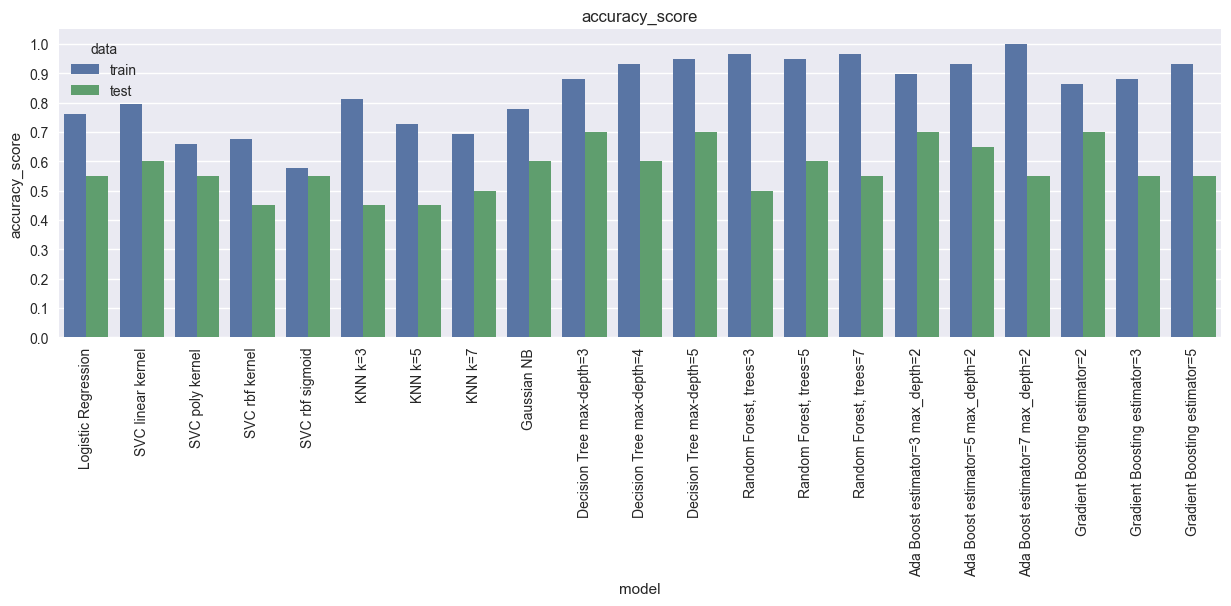

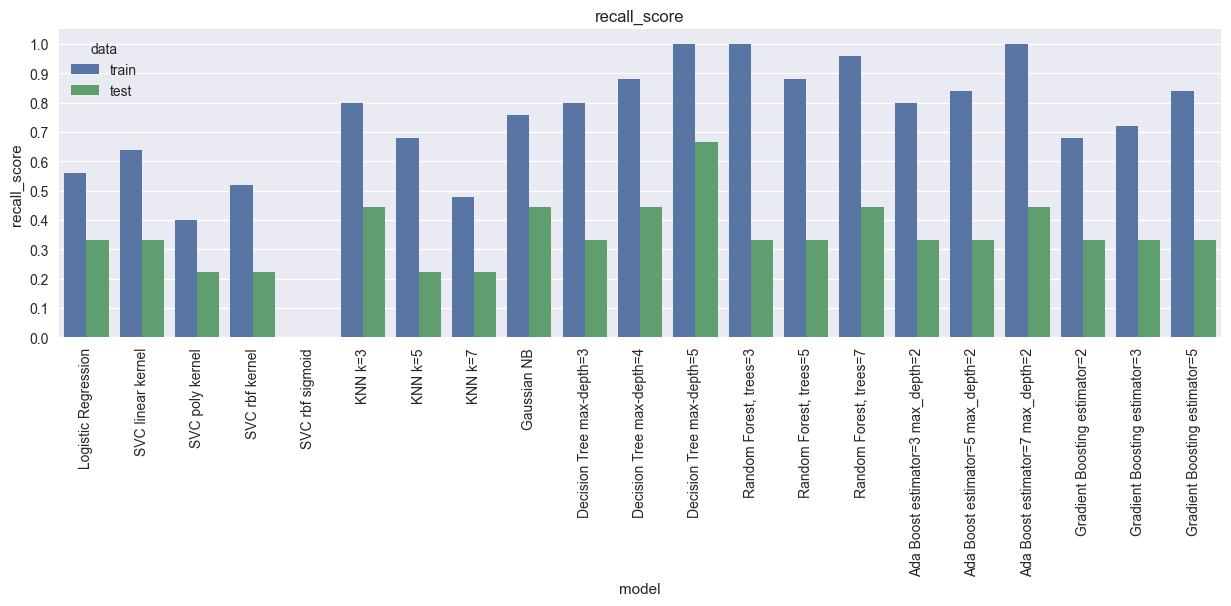

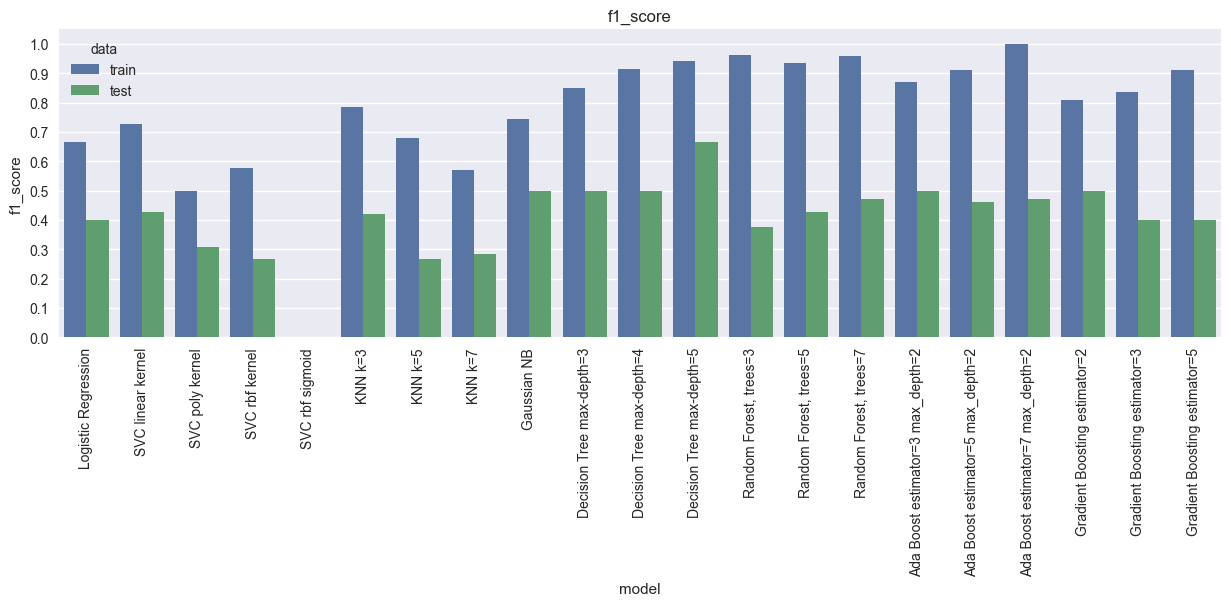

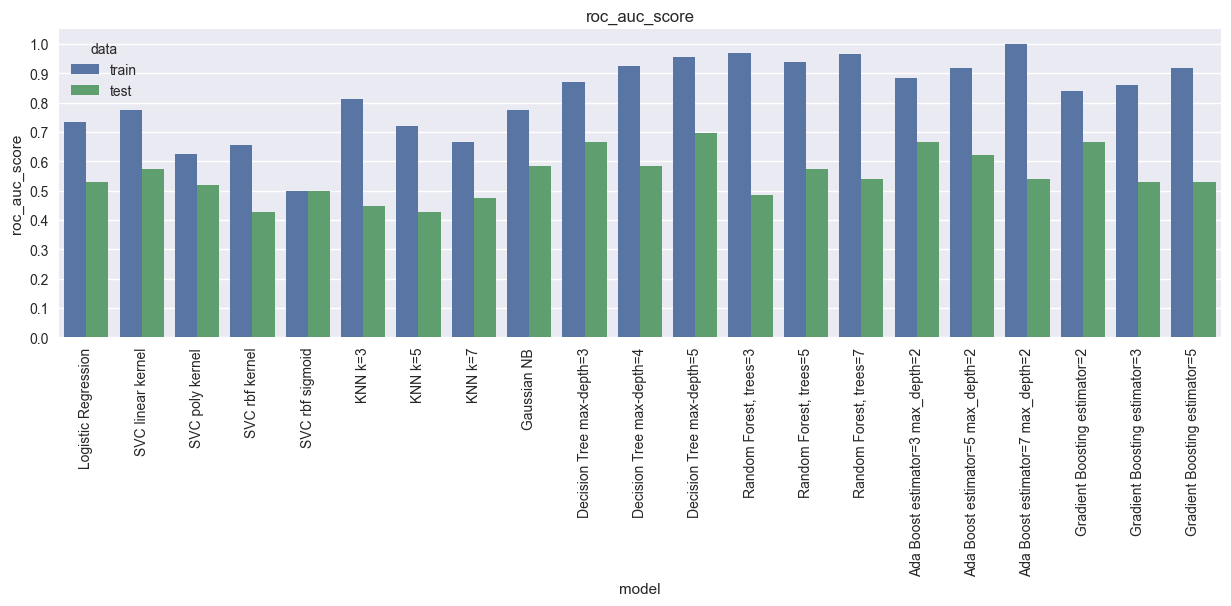

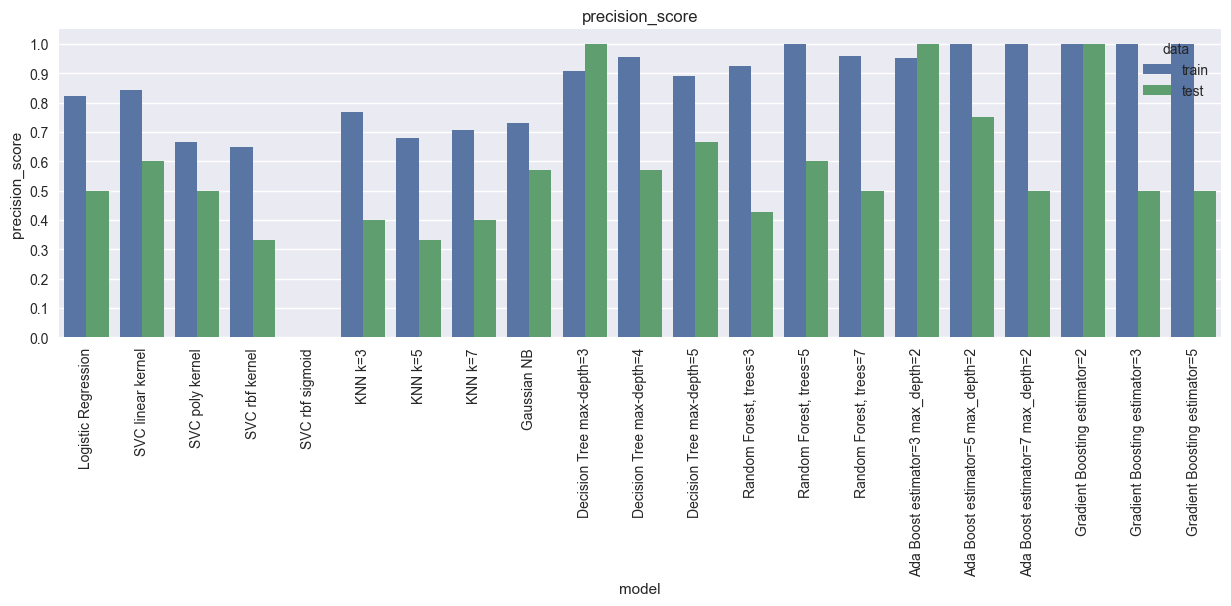

In [823]:
for metric in evaluation_dataset.columns: 
    if metric in ['model', 'data']:
        continue

    plt.figure(figsize=(15,4))
    plt.title(f"{metric}")
    sns.barplot(evaluation_dataset, x='model',y=metric, hue='data')
    plt.xticks(rotation = 90)
    plt.yticks(np.linspace(0,1,11))
    plt.show()

# Model Exploration

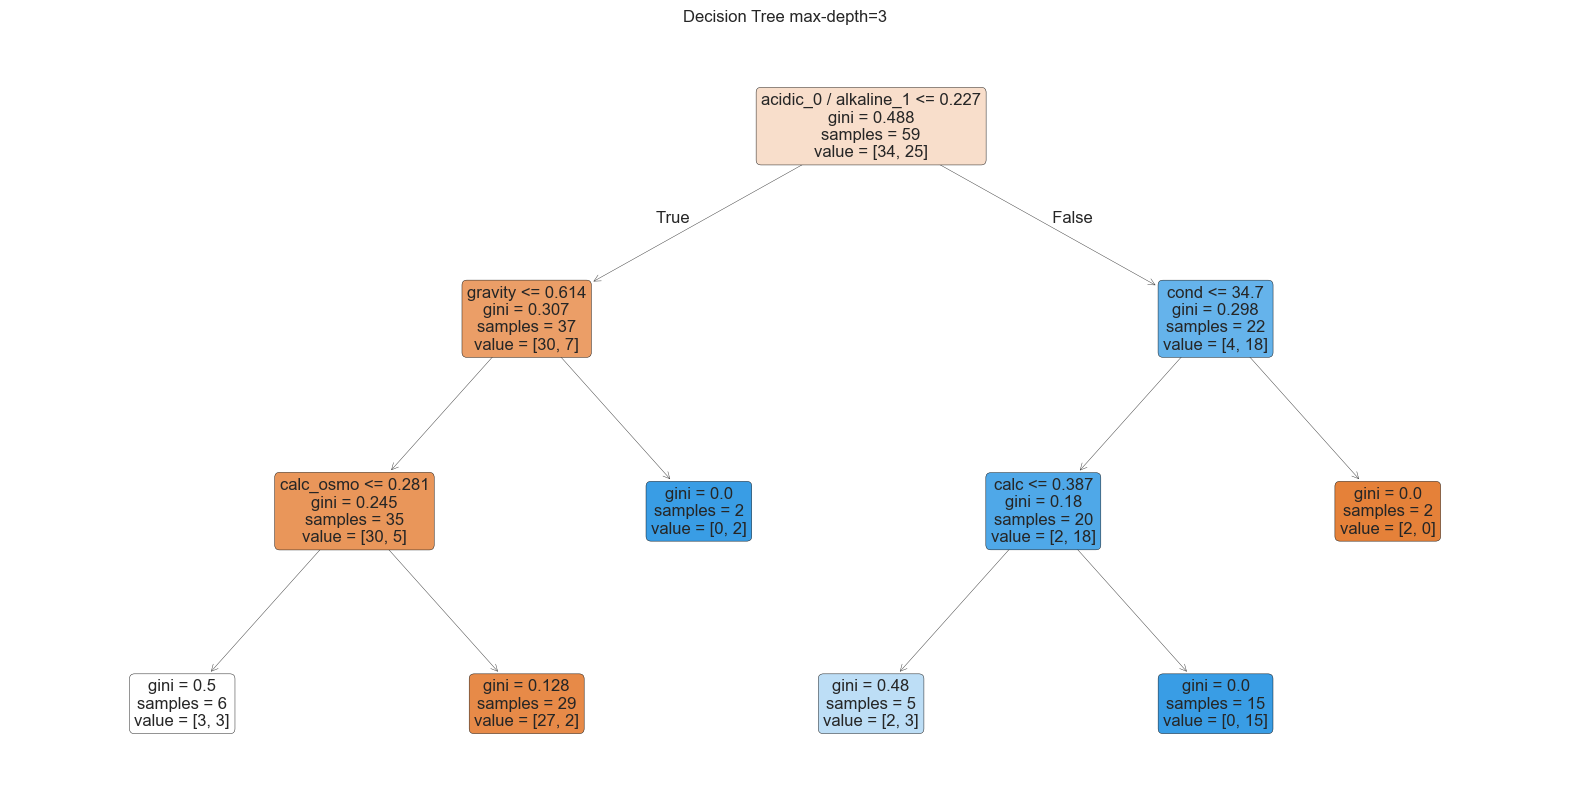

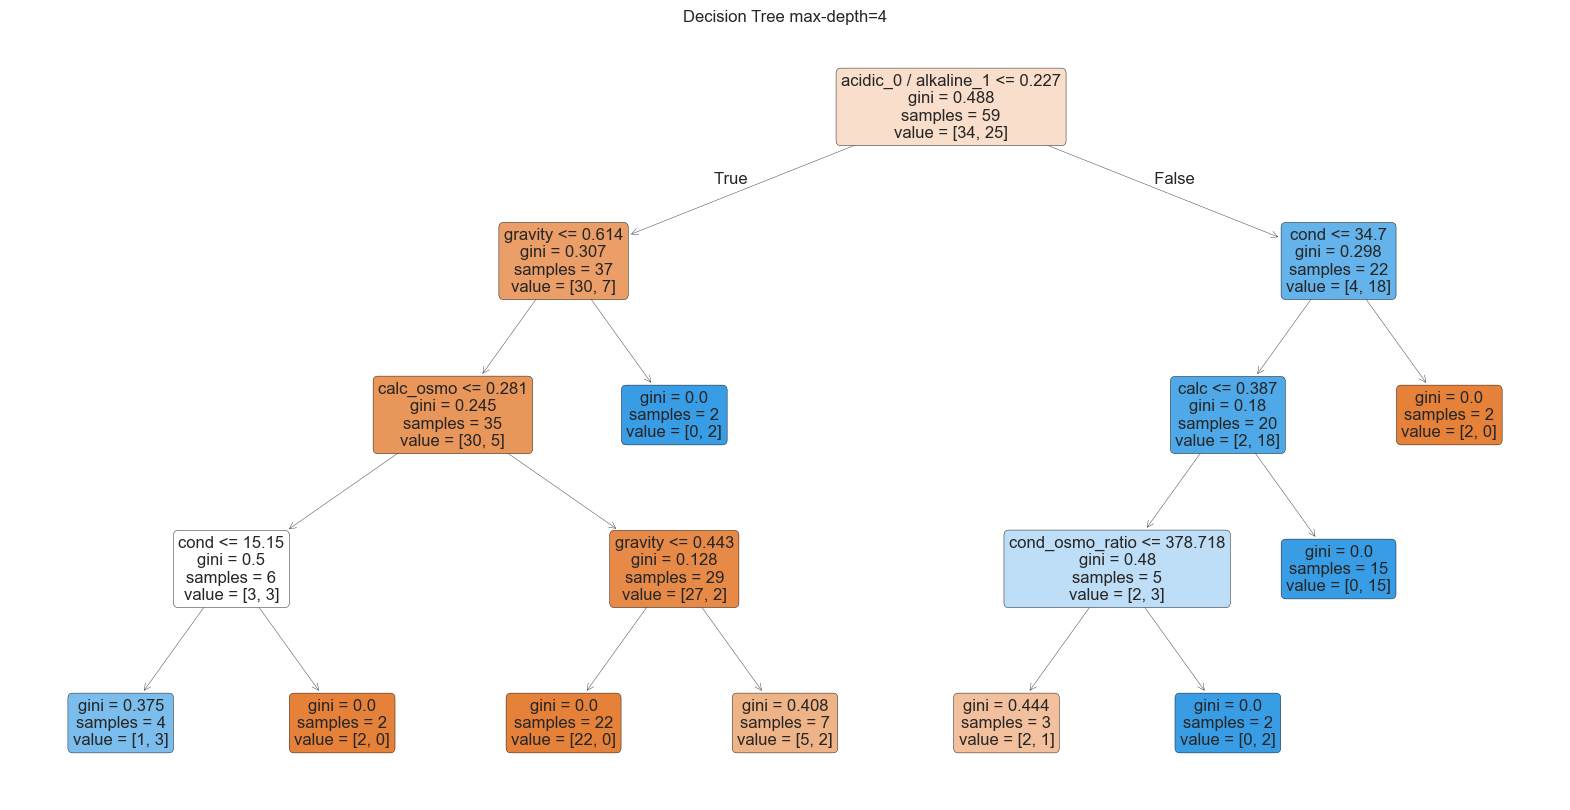

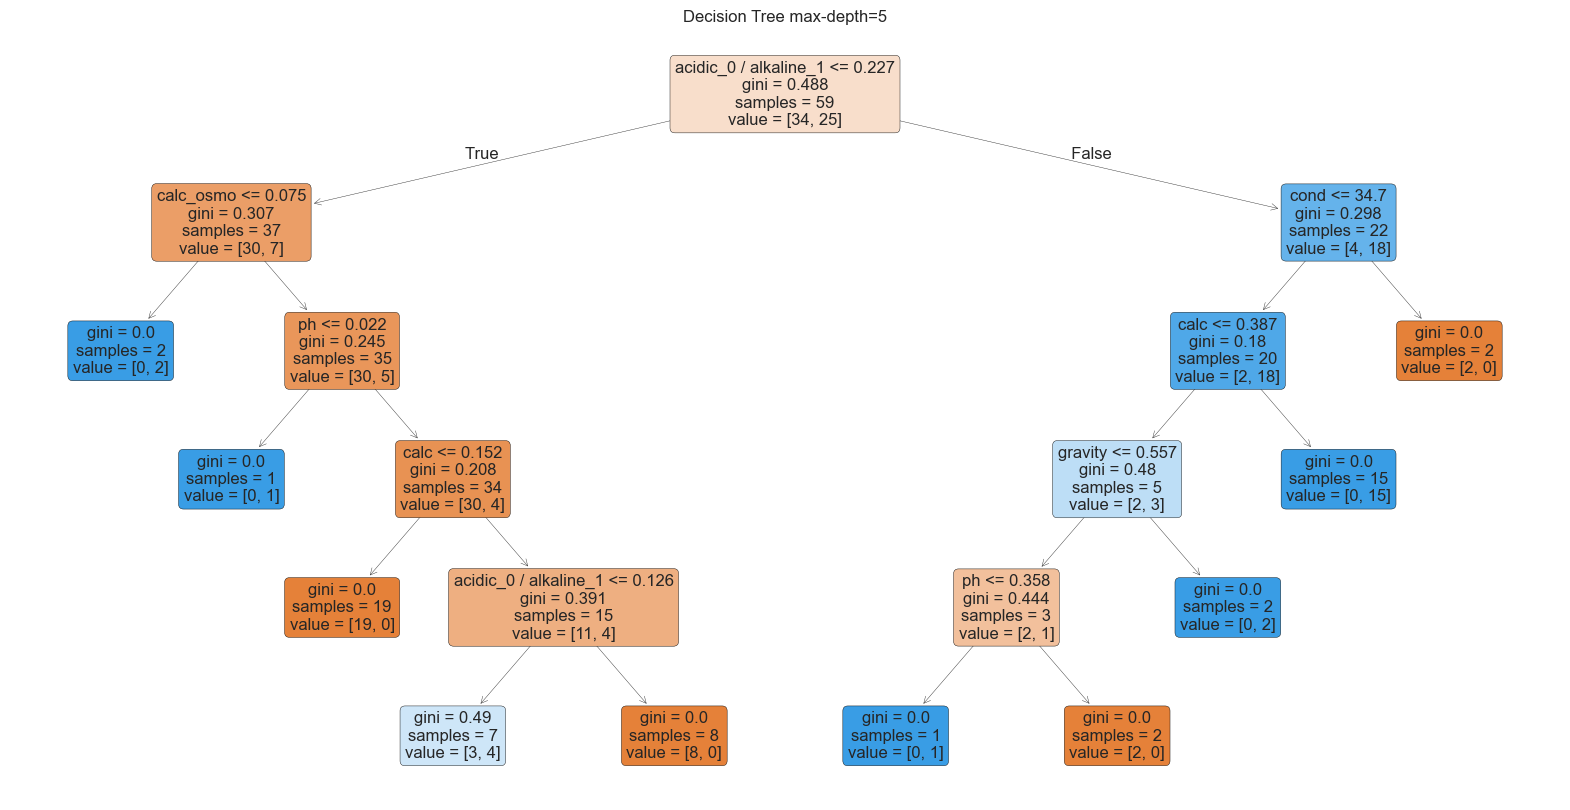

In [824]:
for model in models_list:
    if type(model.model) is DecisionTreeClassifier:
        tree_model = model.model

        plt.figure(figsize=(20, 10))
        plot_tree(tree_model, 
                feature_names=trainable_df.columns, 
                filled=True, 
                rounded=True, 
                fontsize=12)
        
        plt.title(model.name)
        plt.show()
        

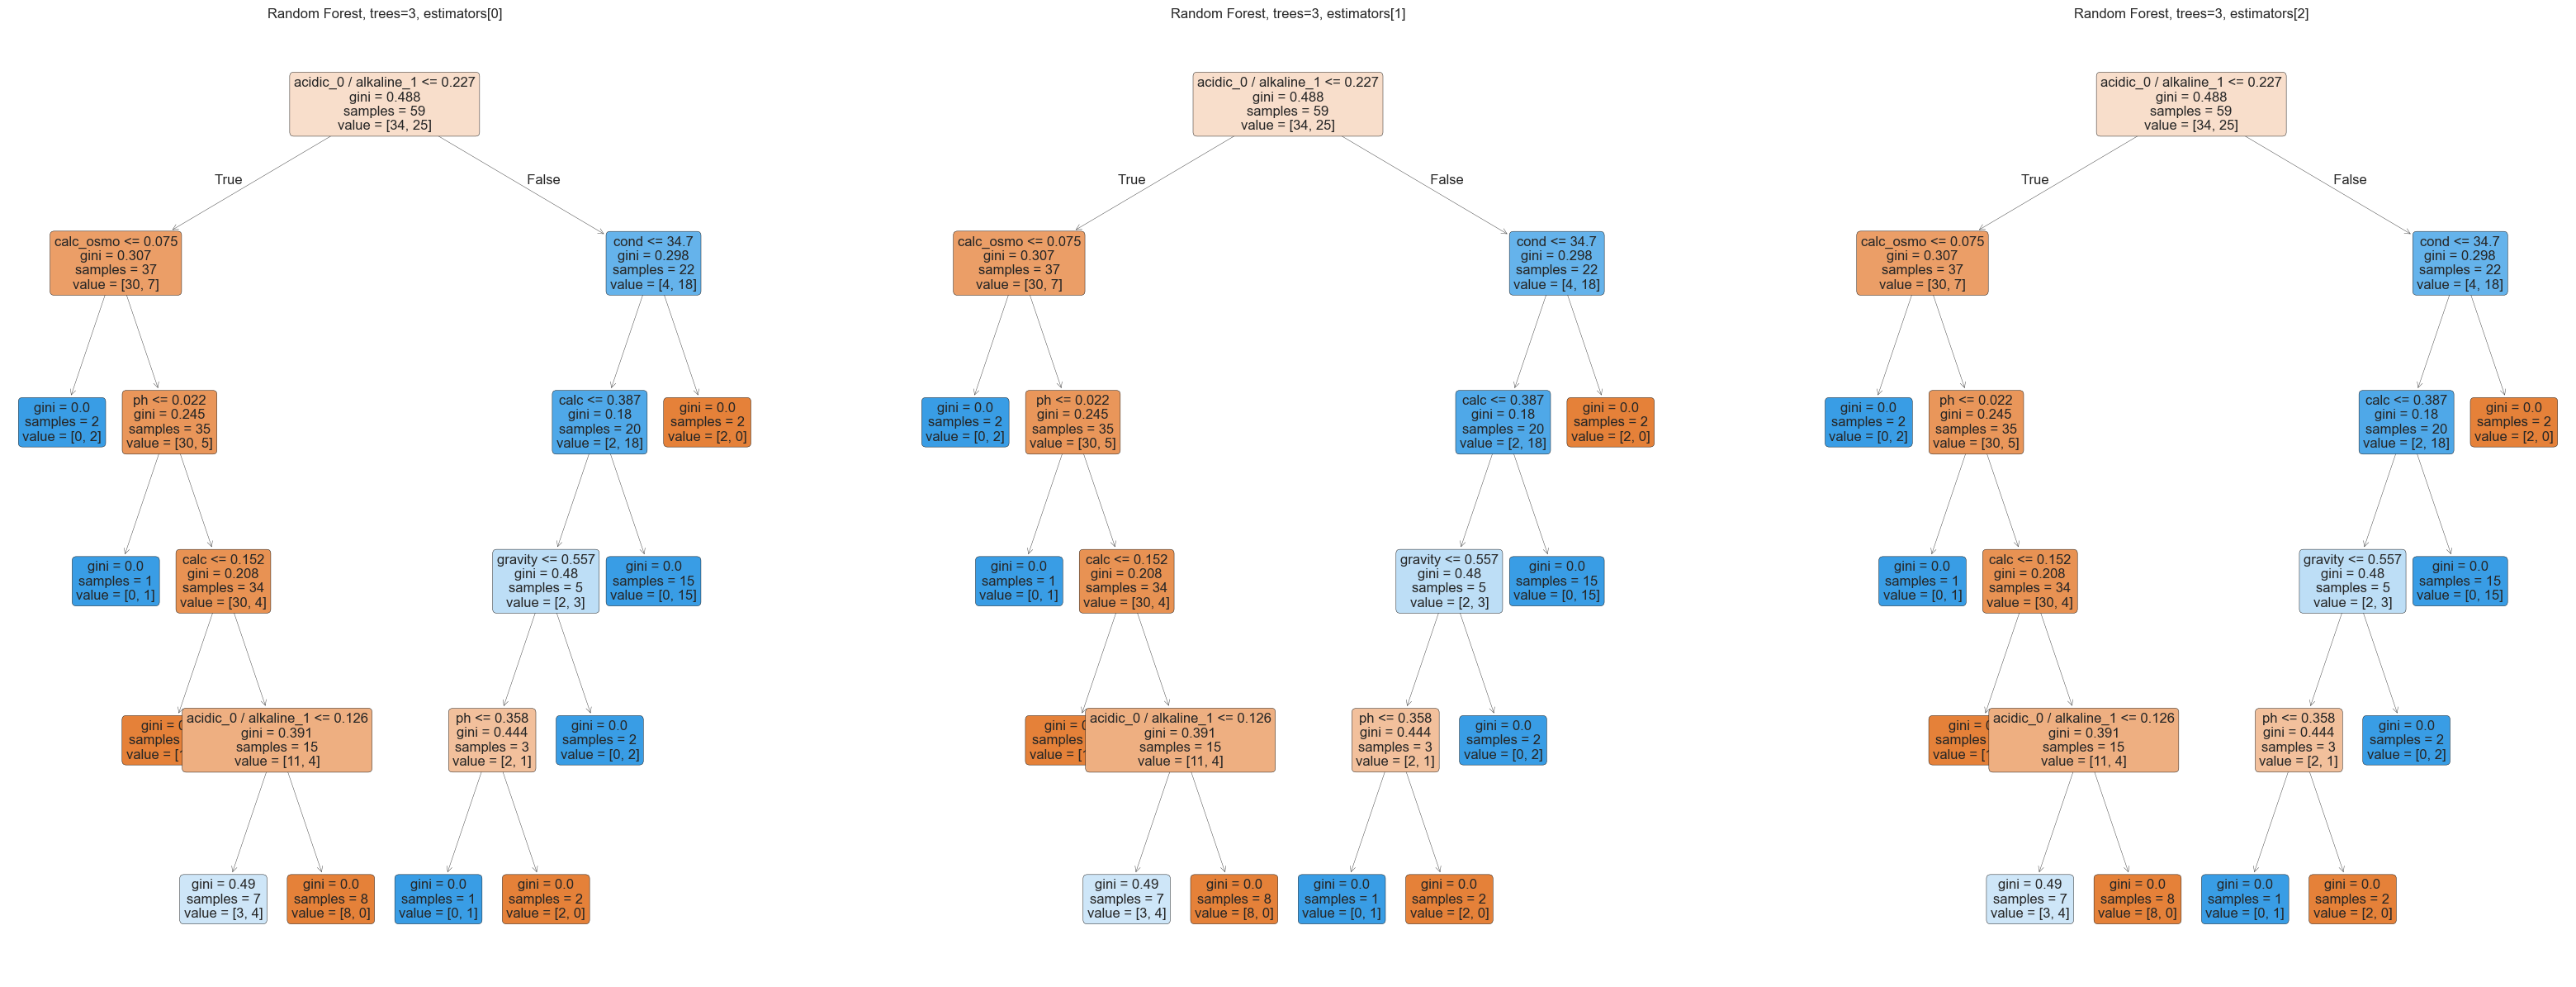

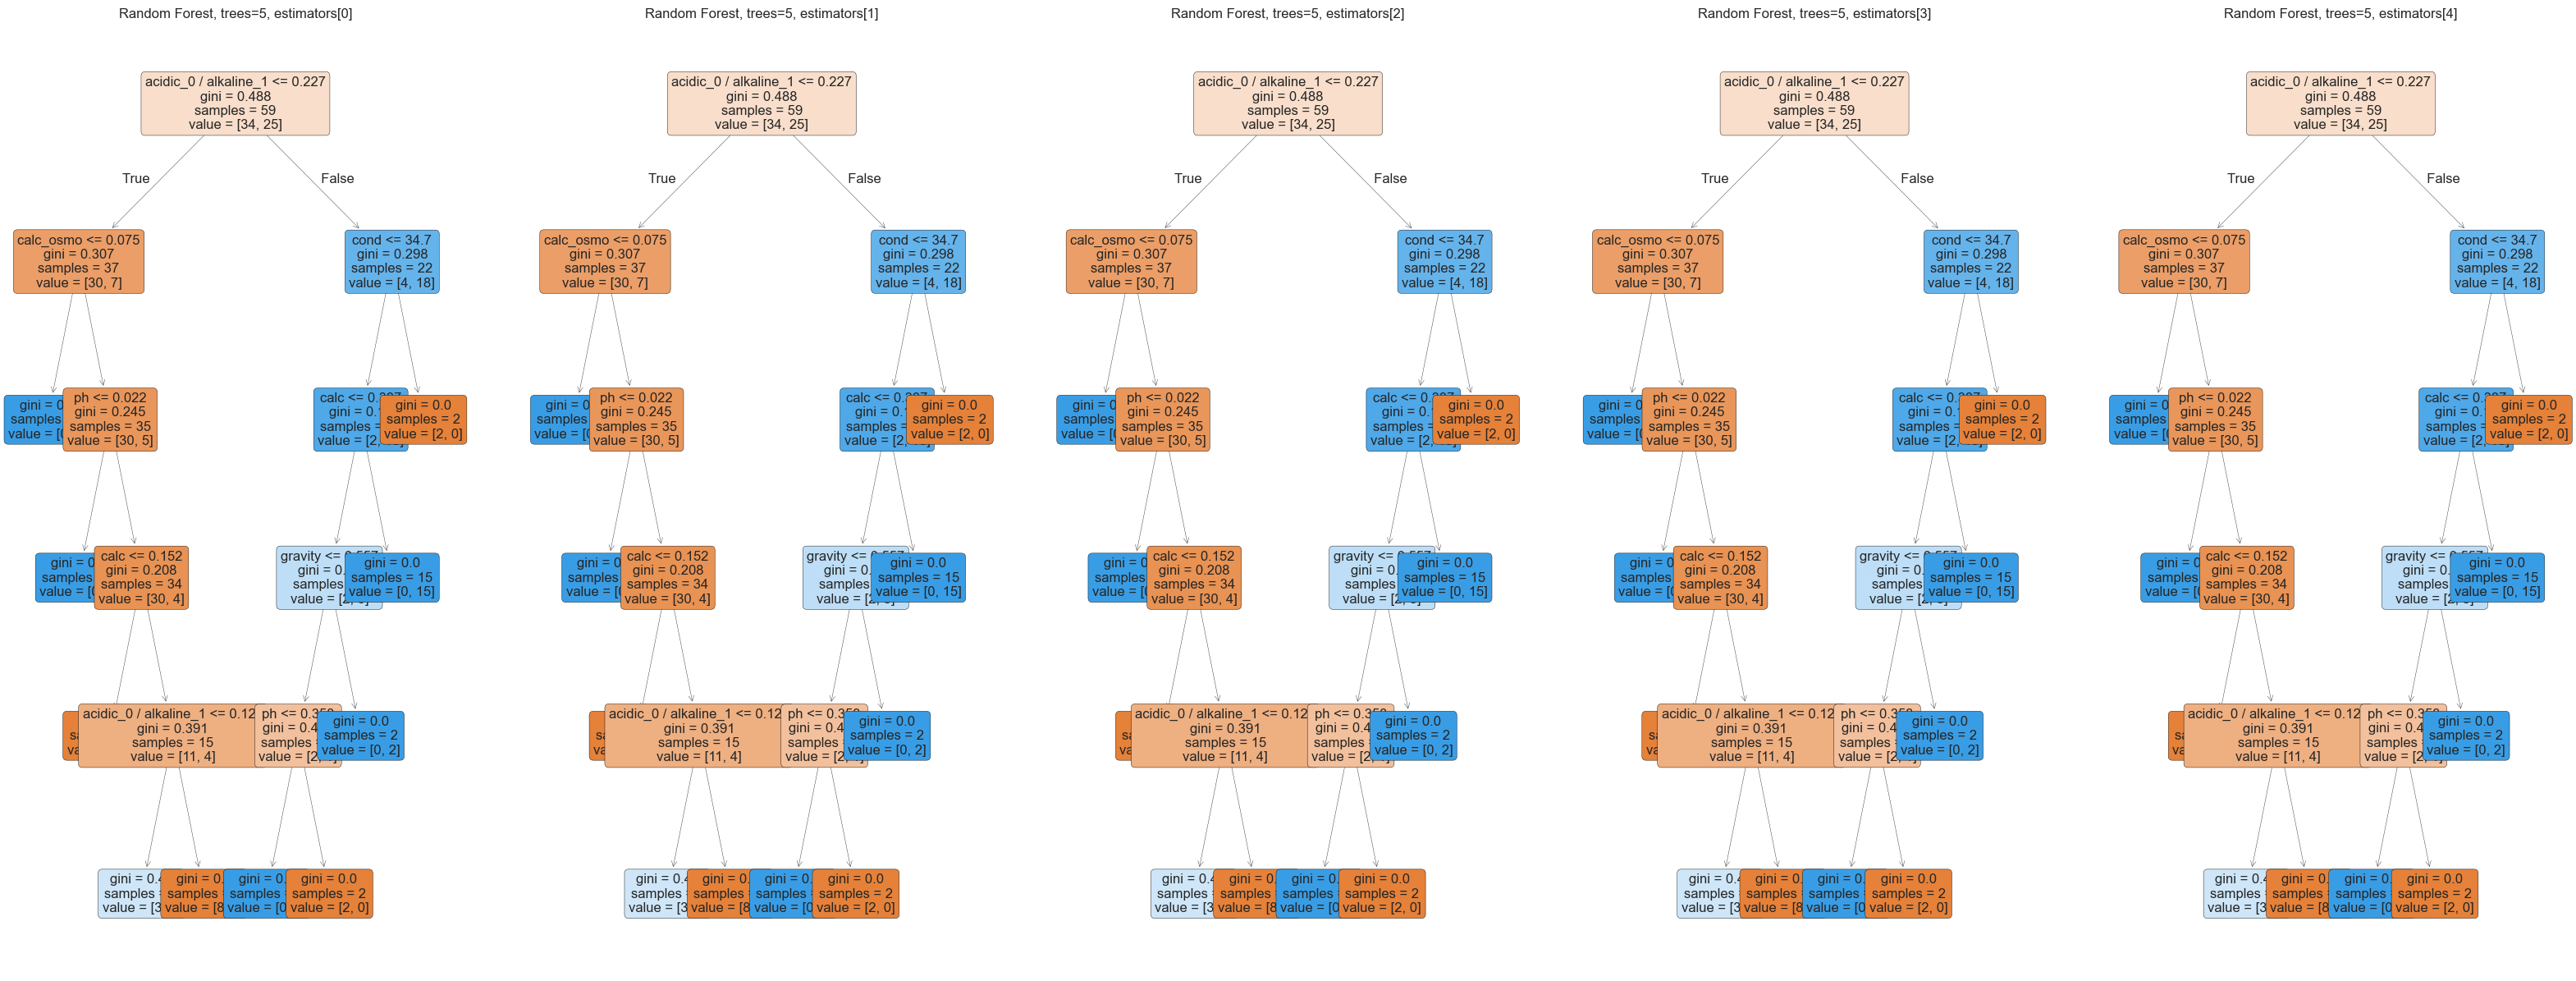

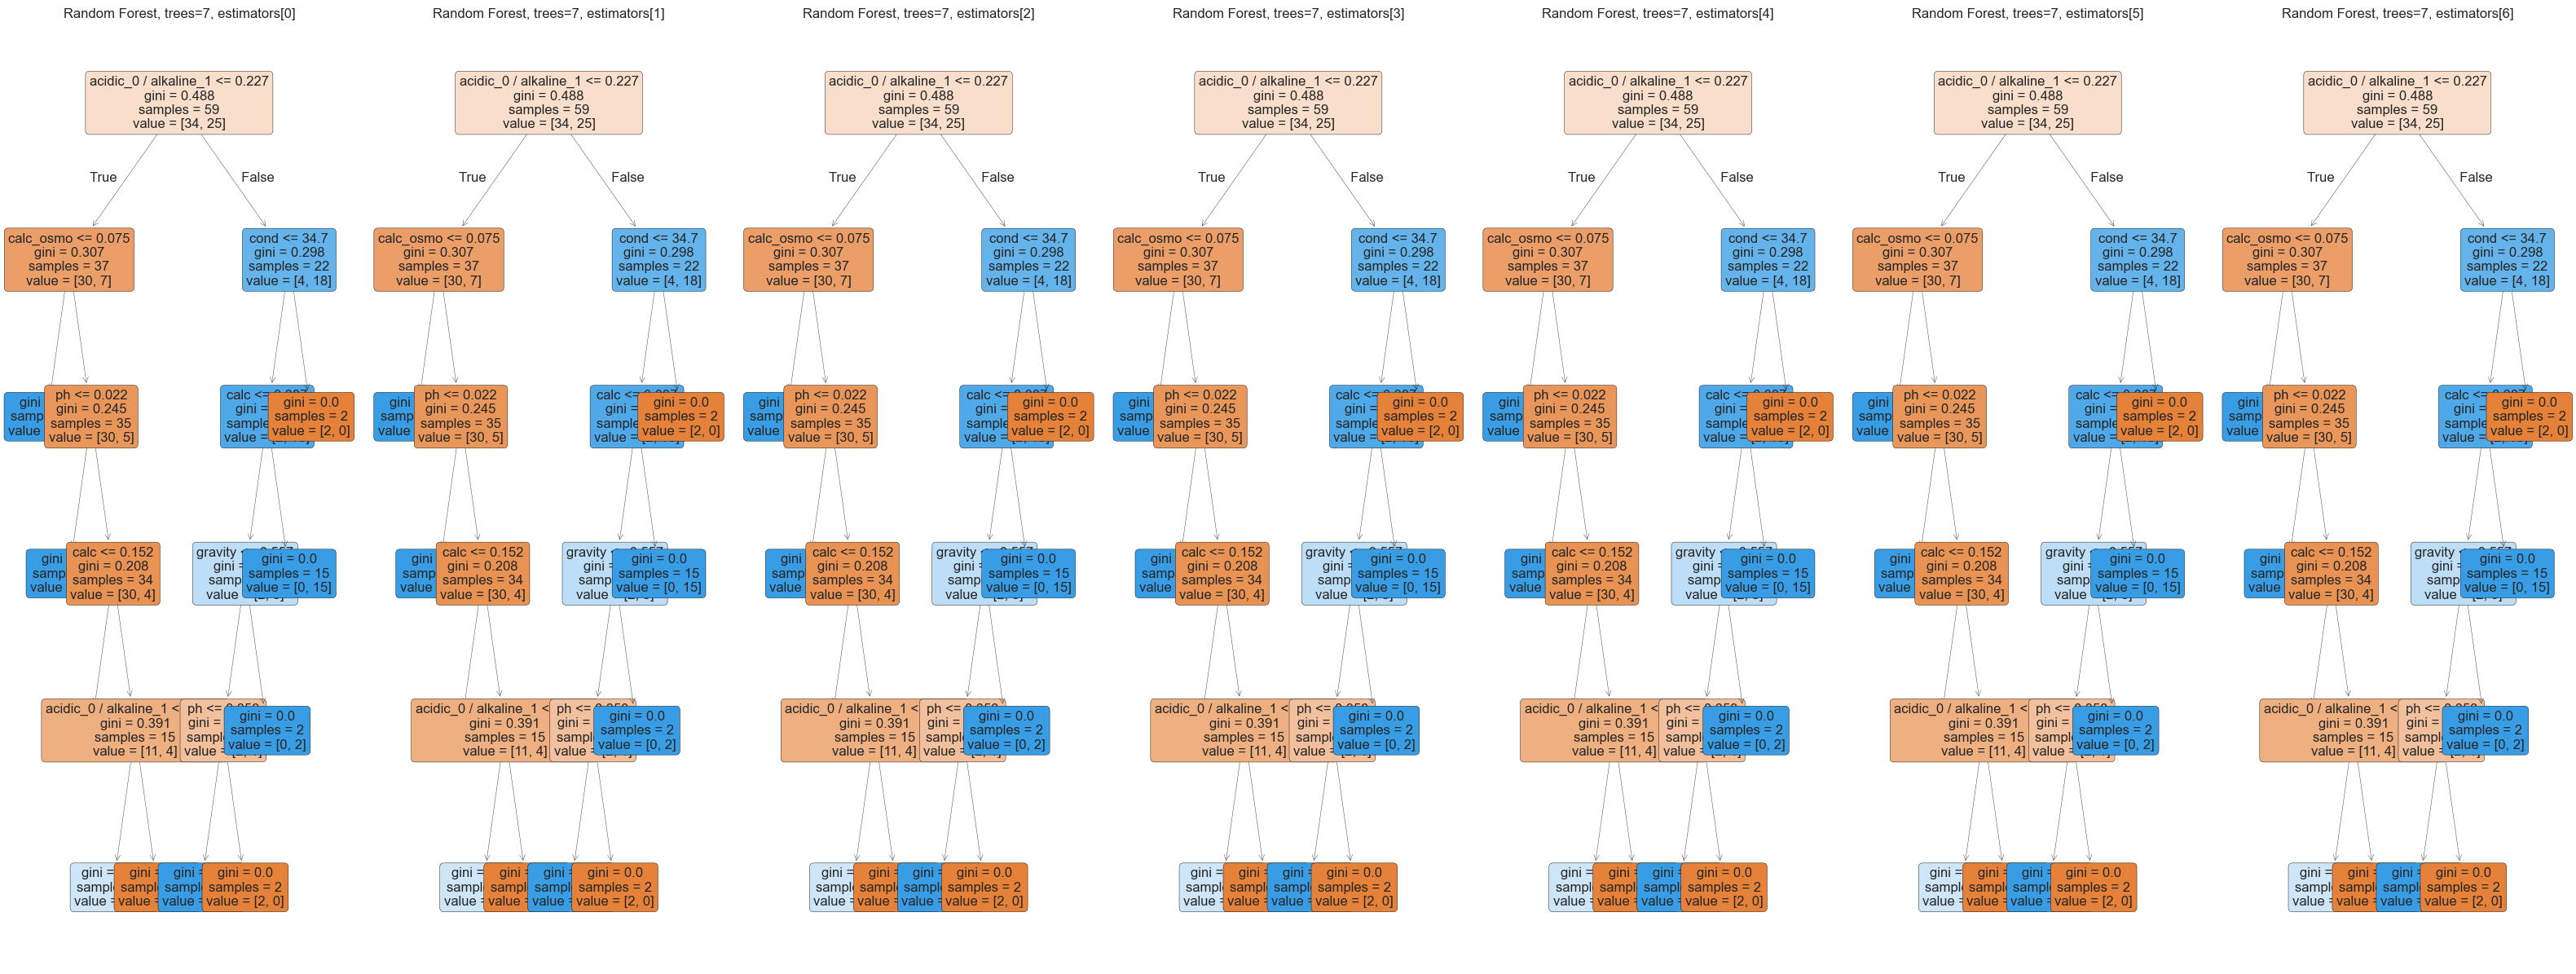

In [825]:
for model in models_list:
    if type(model.model) is RandomForestClassifier:
        rf_model = model.model

        plt.figure(figsize=(40, 15))

        for i, estimator in enumerate(rf_model.estimators_):
            plt.subplot(1, len(rf_model.estimators_), i+1)

            plot_tree(tree_model, 
                    feature_names=trainable_df.columns, 
                    filled=True, 
                    rounded=True, 
                    fontsize=12)
            
            plt.title(f"{model.name}, estimators[{i}]")
        
        plt.show()
        

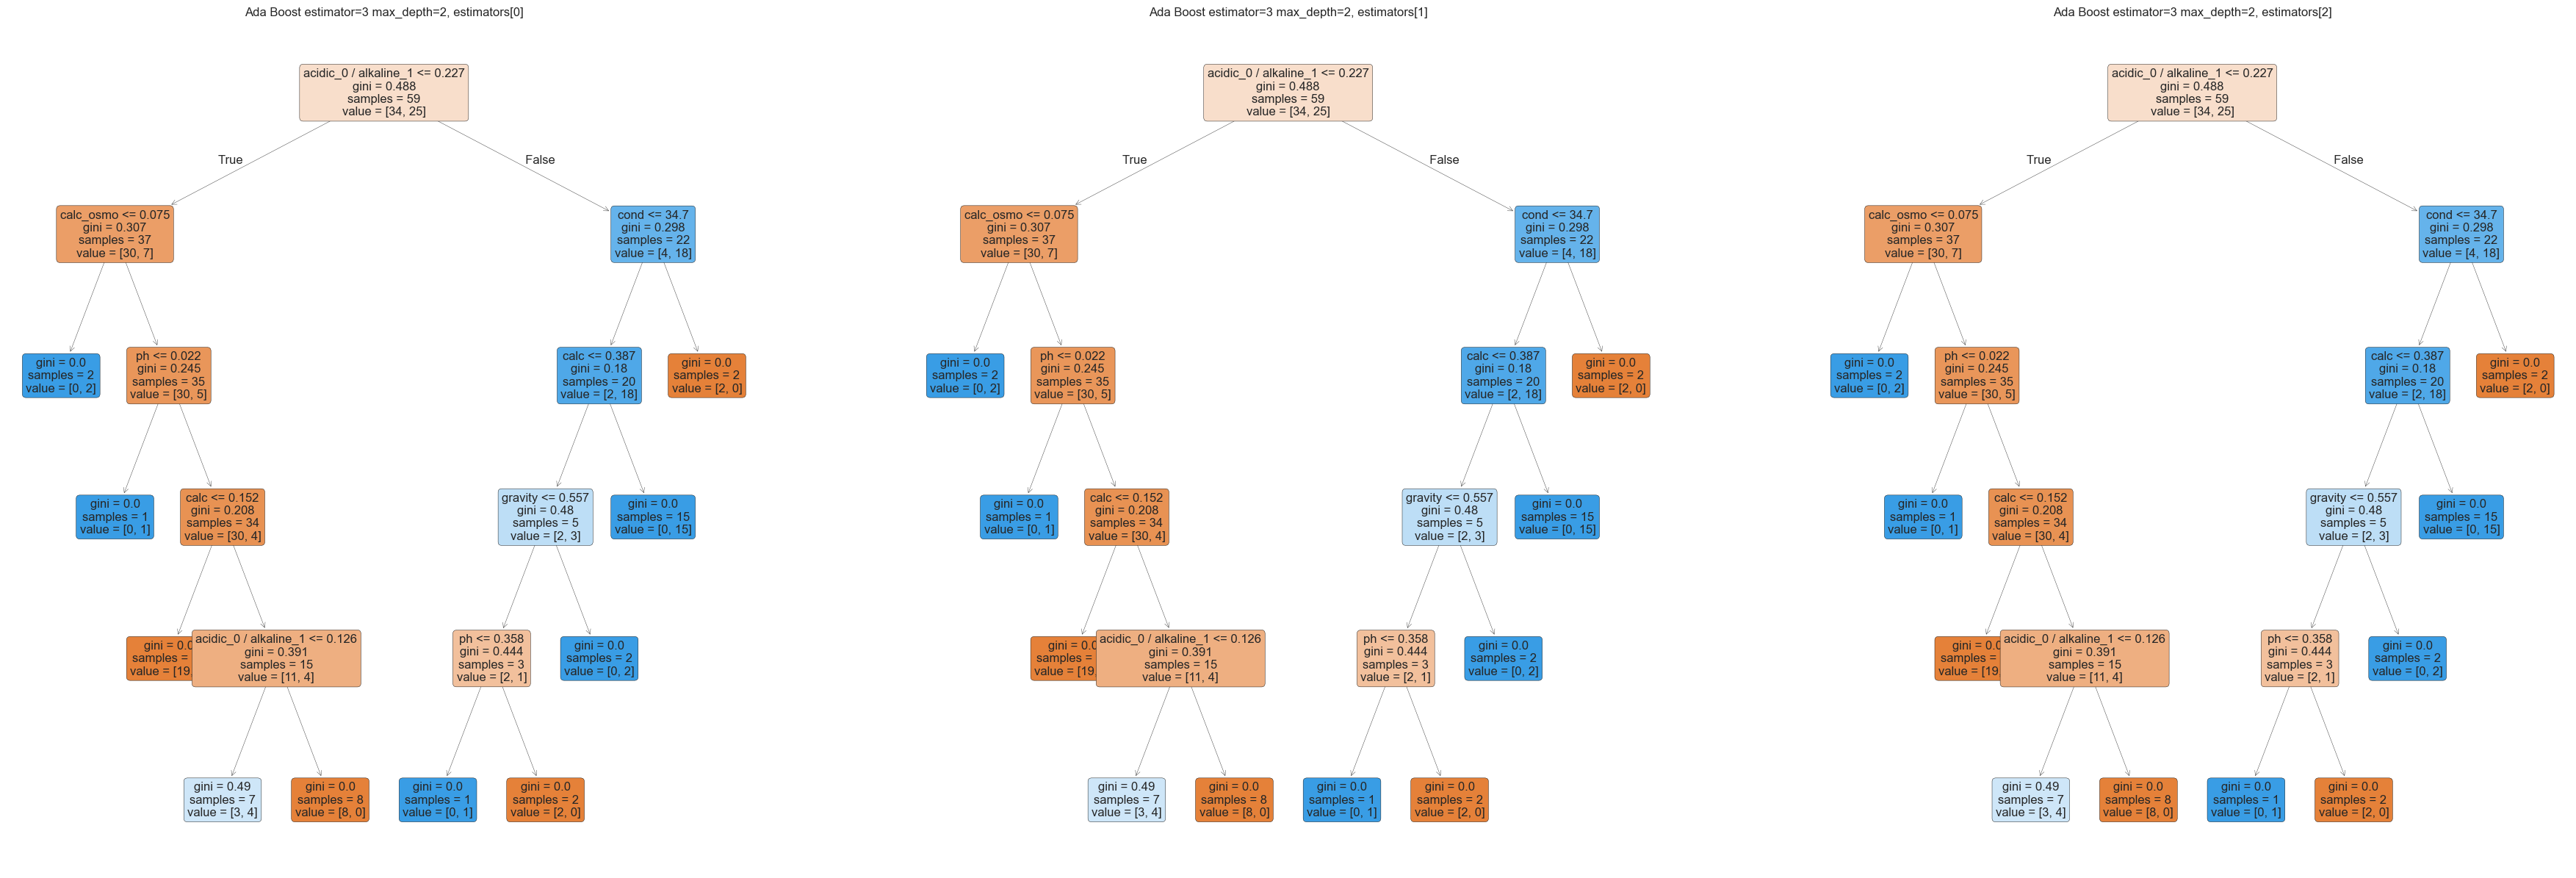

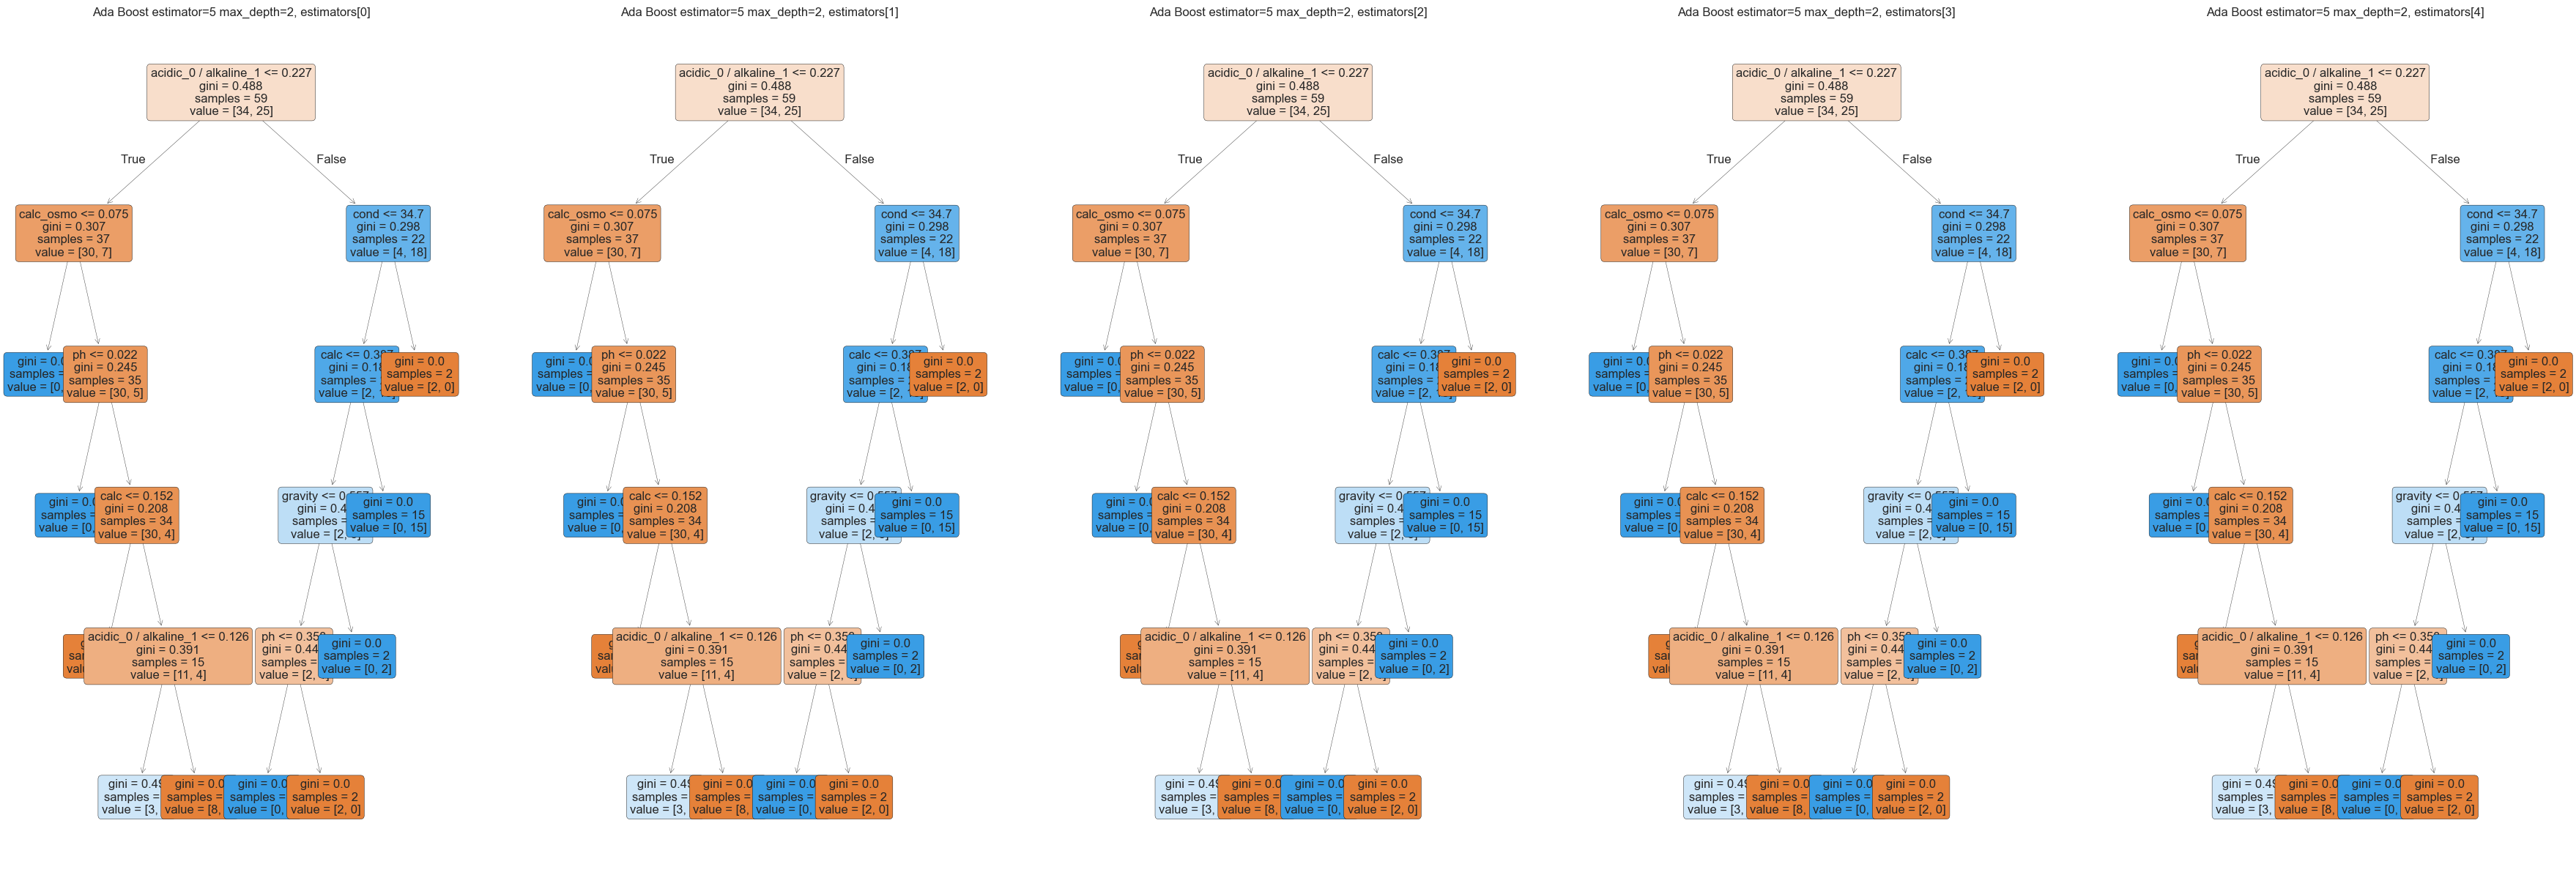

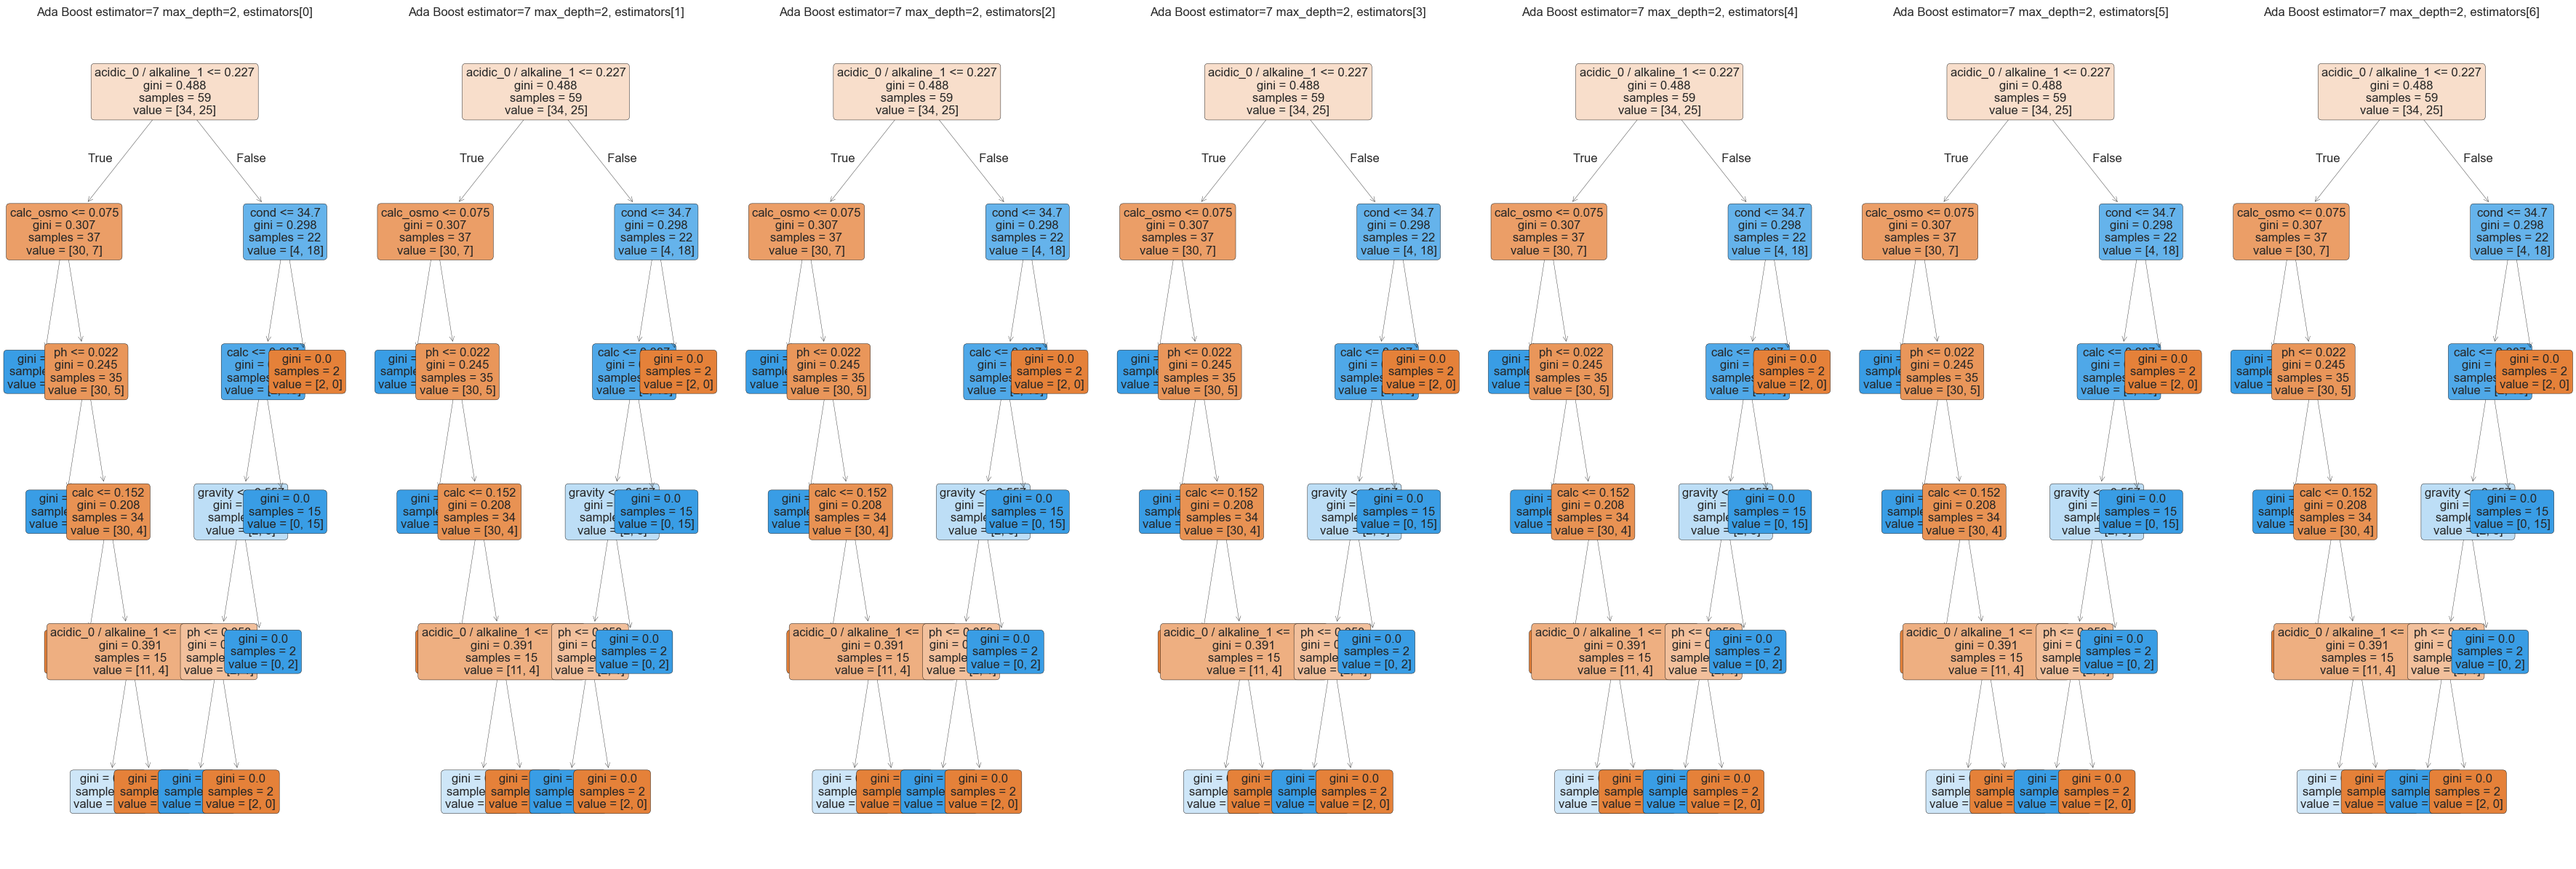

In [835]:
for model in models_list:
    if type(model.model) is AdaBoostClassifier:
        ada_model = model.model

        plt.figure(figsize=(45, 15))

        for i, estimator in enumerate(ada_model.estimators_):
            plt.subplot(1, len(ada_model.estimators_), i+1)

            plot_tree(tree_model, 
                    feature_names=trainable_df.columns, 
                    filled=True, 
                    rounded=True, 
                    fontsize=12)
            
            plt.title(f"{model.name}, estimators[{i}]")
        
        plt.show()
        

# Caching

metrics

In [826]:
evaluation_dataset.to_csv("eval_dataset.csv")

y vs yhat

In [827]:
CAHCE_Y_VS_Y_HAT_DIR_NAME = 'models_predictions' 
os.makedirs(CAHCE_Y_VS_Y_HAT_DIR_NAME, exist_ok=True)

In [837]:
for model in models_list:
    pad_width = len(y_train) - len(y_test)

    pd.DataFrame(
        {
            'actual Y train' : y_train,
            'predict Y train' : model.y_train_hat,
            'actual Y test' : np.pad(y_test, (0, pad_width), mode='constant', constant_values=-1),
            'predict Y test' : np.pad(model.y_test_hat, (0, pad_width), mode='constant', constant_values=-1),
        }
    ).to_csv(f"{CAHCE_Y_VS_Y_HAT_DIR_NAME}/{model.name}.csv")

ecoders & scalers

In [829]:
CACHE_ENCODE_SCALE_DIR_NAME = 'encoders_scalers' 
os.makedirs(CACHE_ENCODE_SCALE_DIR_NAME, exist_ok=True)

In [830]:
def save_obj(obj, file_name):
    with open(file_name, 'wb') as f:
        pickle.dump(obj, f)        

def load_obj(file_name):
    with open(file_name, 'rb') as f:
        return pickle.load(f)

In [831]:
save_obj( min_max_scaller, f"{CACHE_ENCODE_SCALE_DIR_NAME}/min-max-scaler.pickle" )